In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np 
from pathlib import Path
from hypnose_analysis.utils.metrics_utils import *
from hypnose_analysis.utils.visualization_utils import *
#from utils.visualization_utils import _load_tracking_and_behavior
import harp
from ipywidgets import widgets
from IPython.display import display
import moviepy
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Metrics Visualization

In [2]:
subjid = 40
dates = (20251118, 20251231)

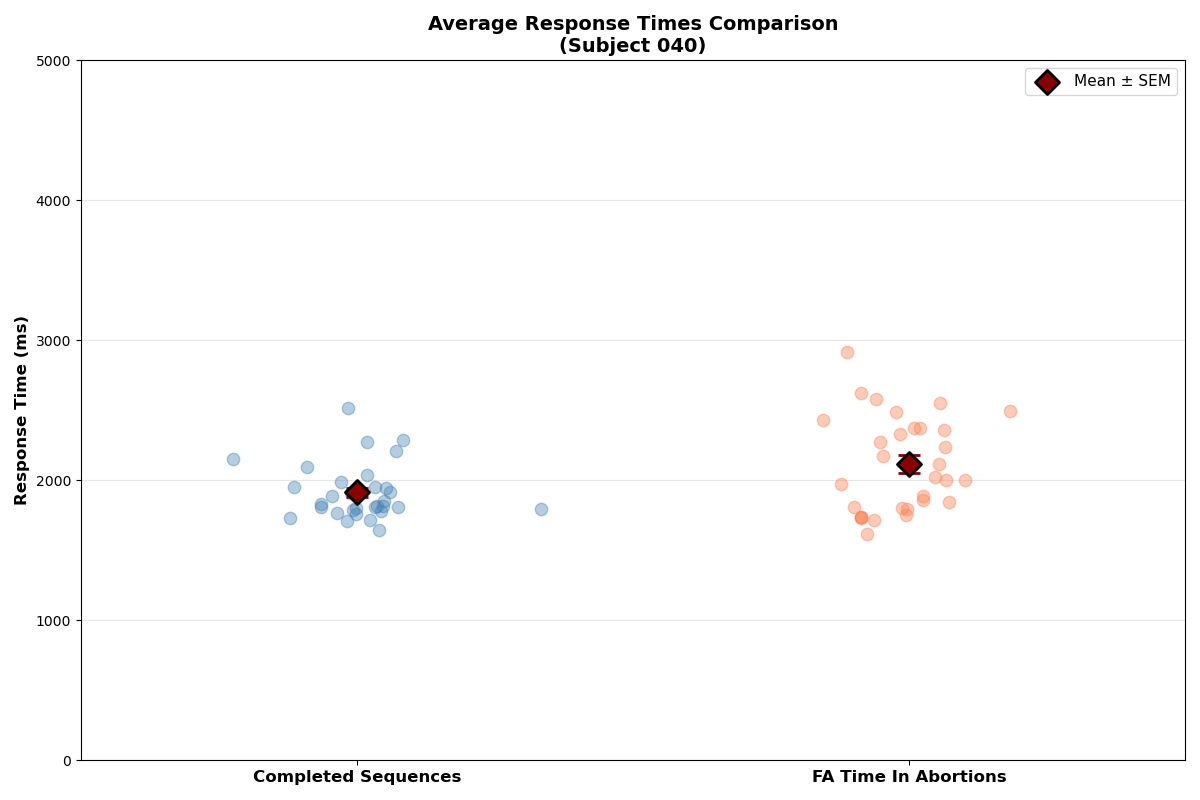

In [5]:
# Plots response times for completes trials vs early choice trials as boxplots
fig, ax = plot_response_times_completed_vs_fa(subjid, dates=dates, y_limit=5000)

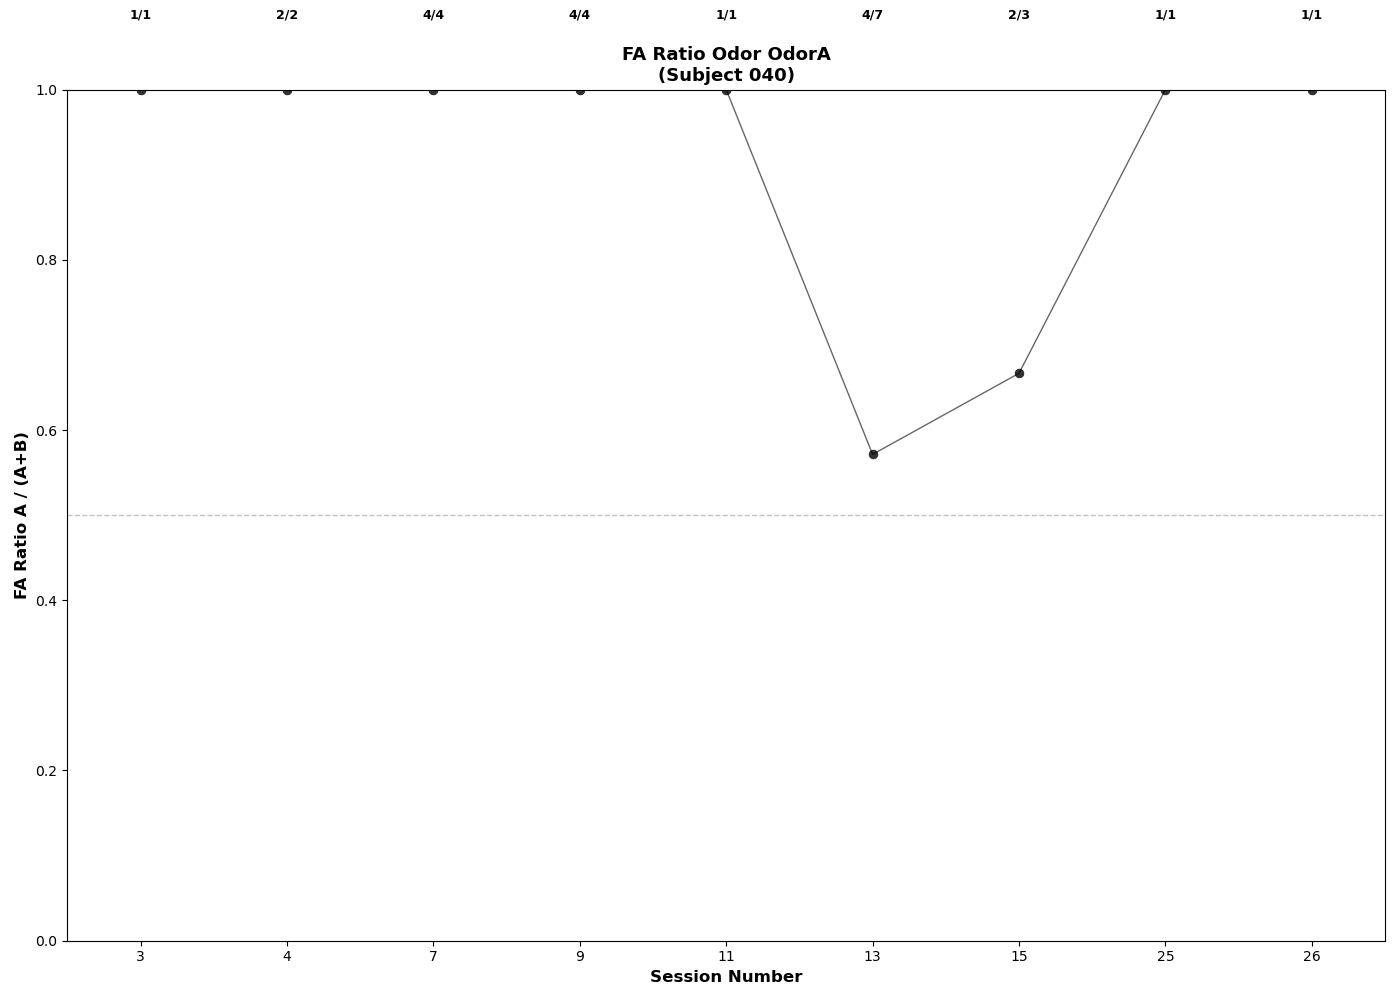

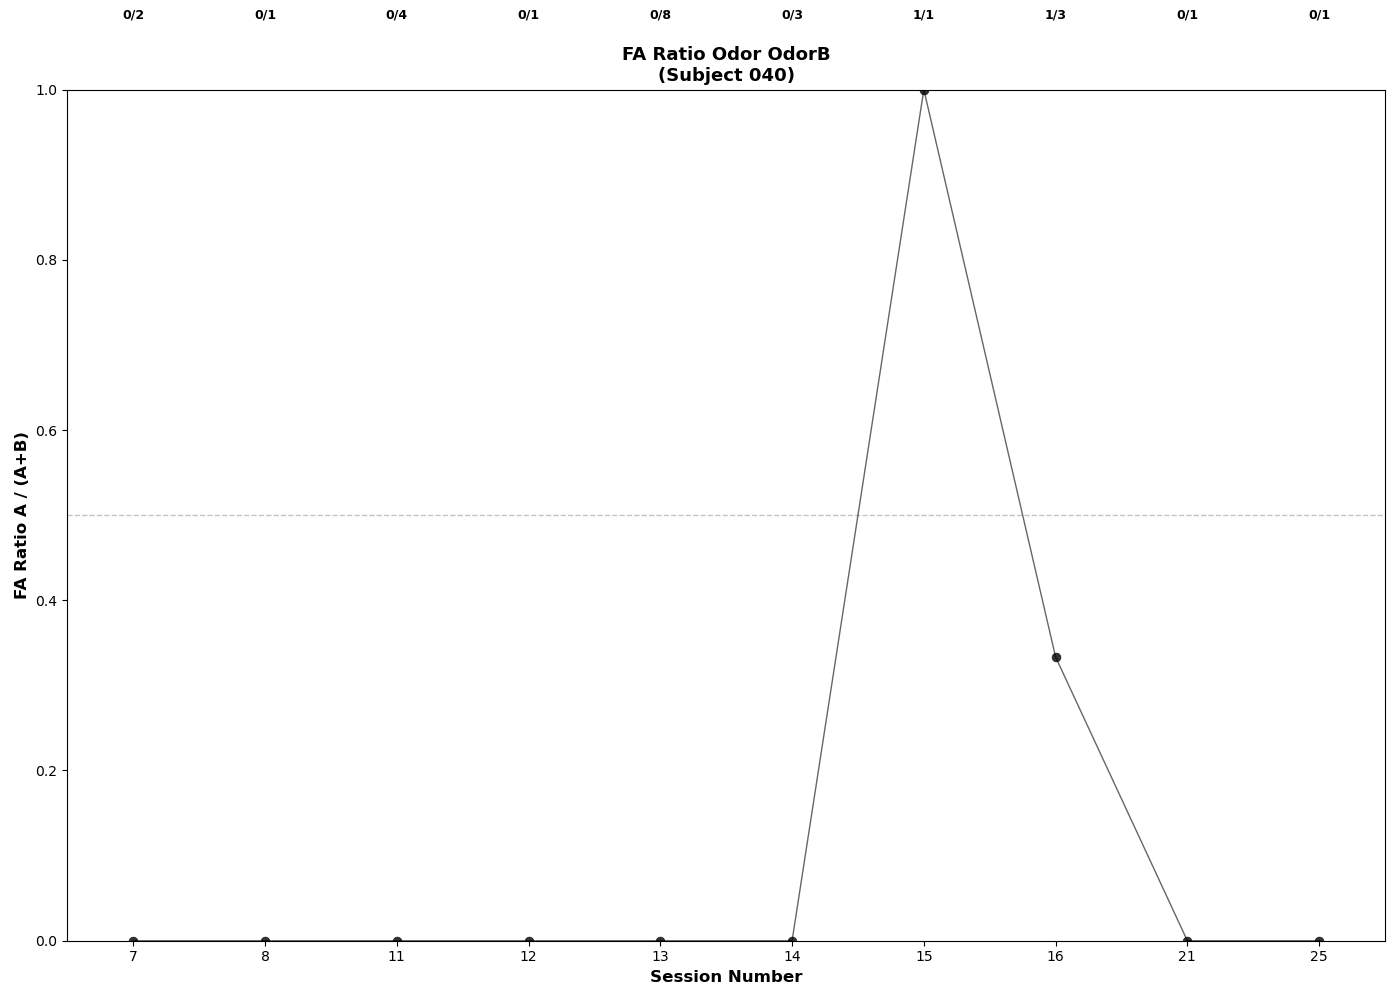

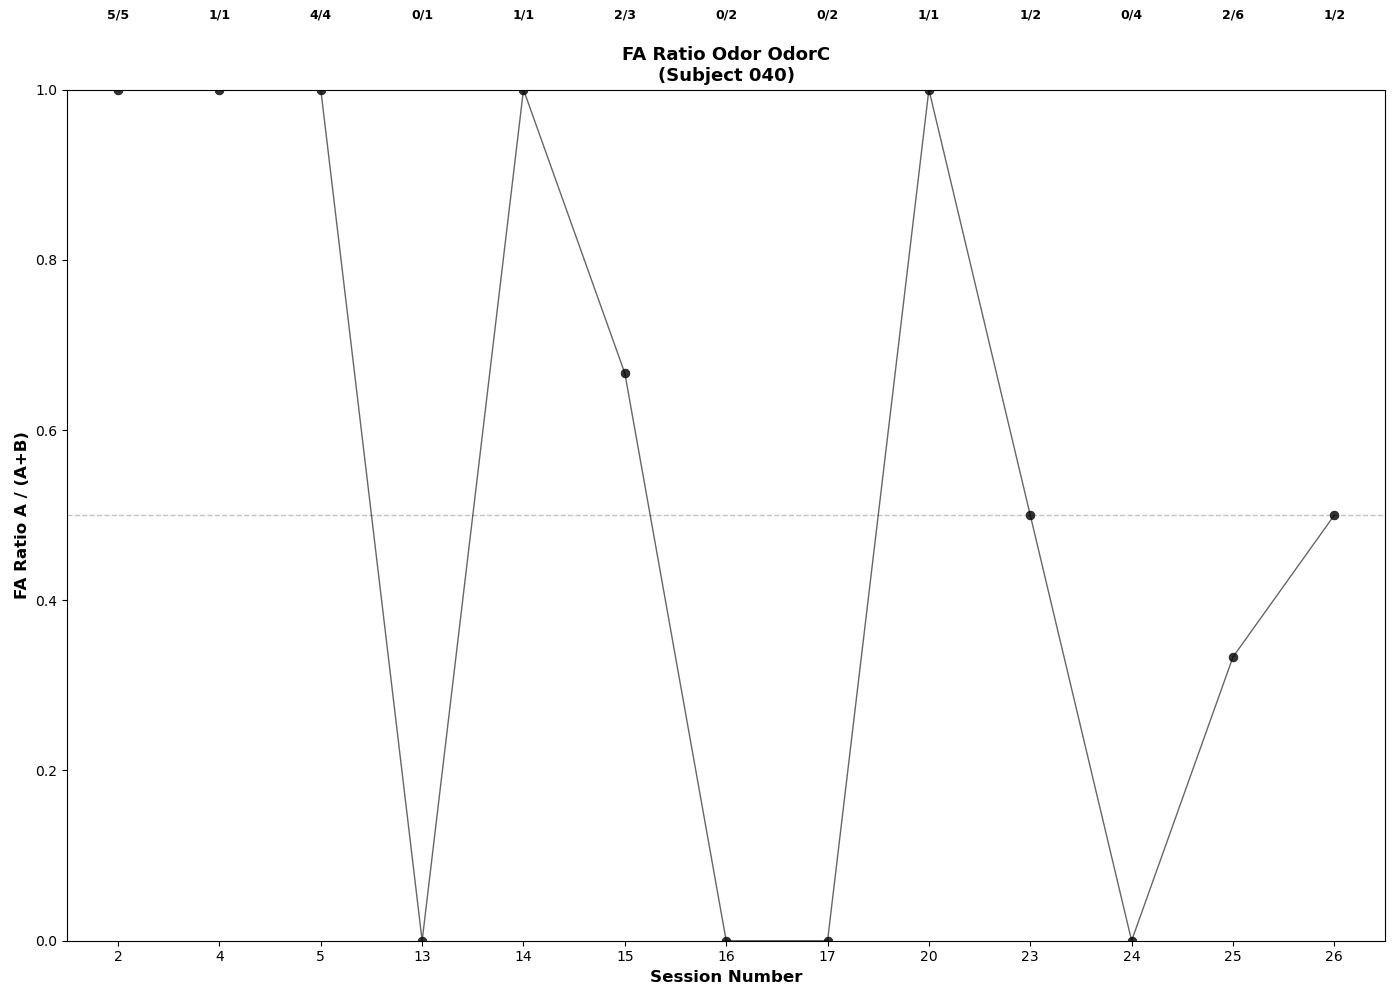

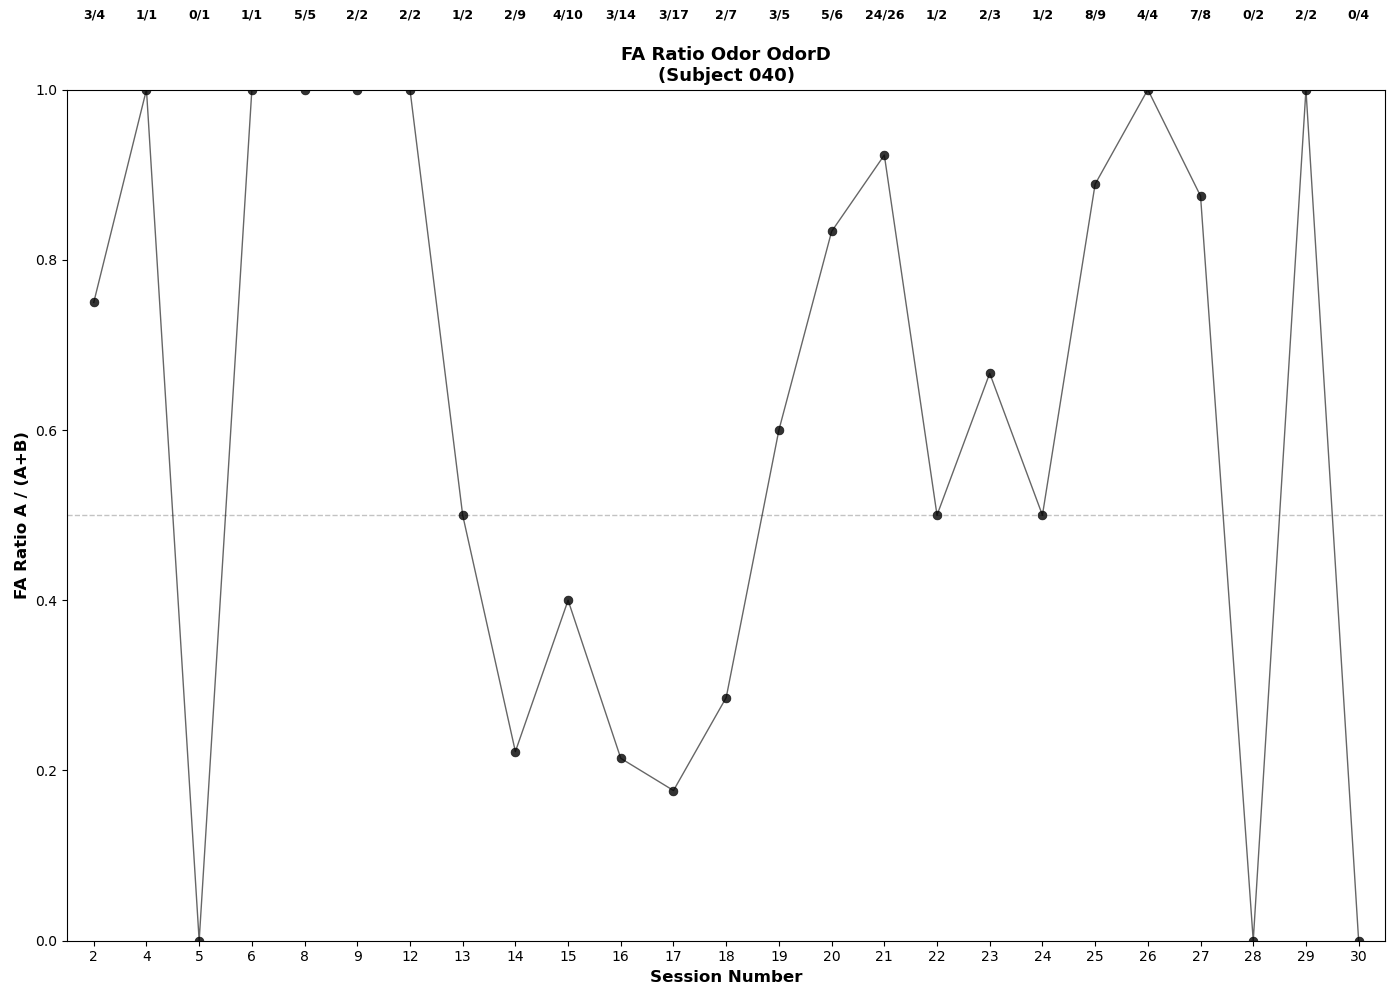

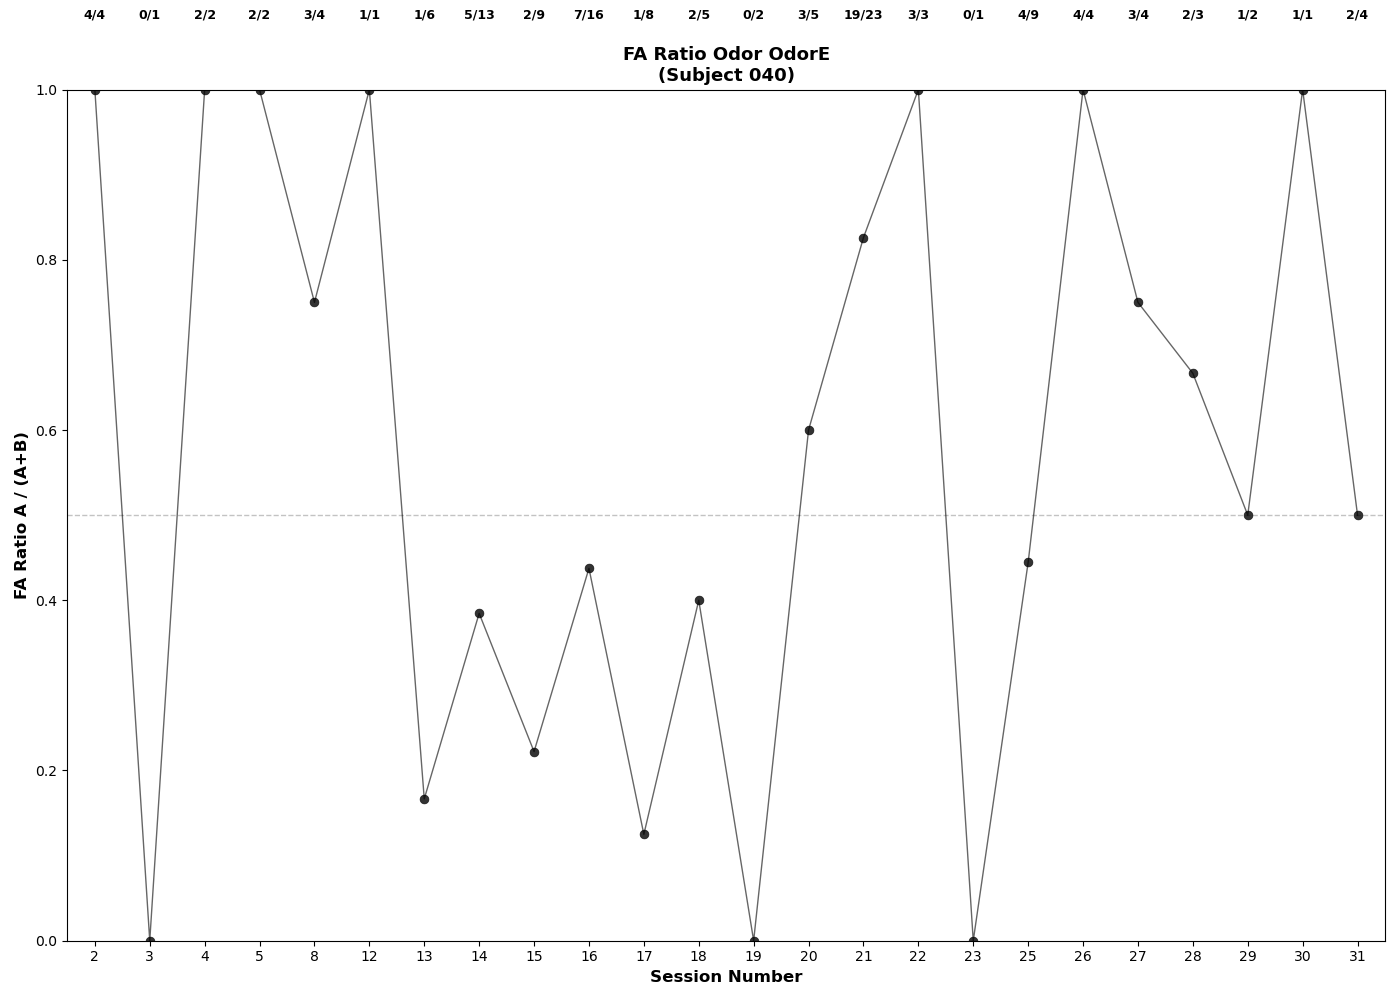

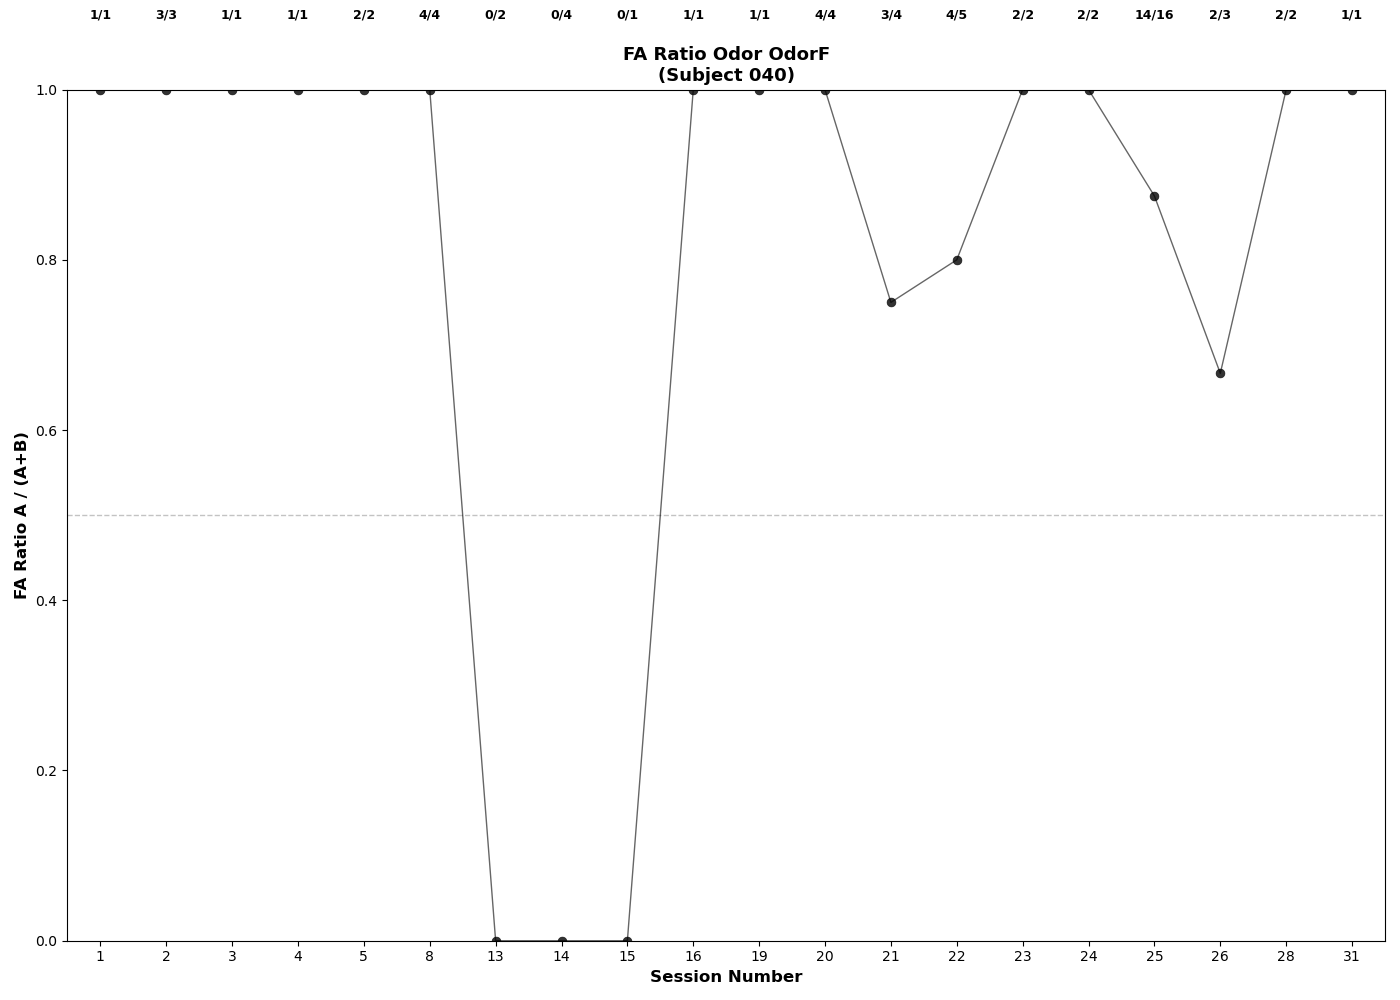

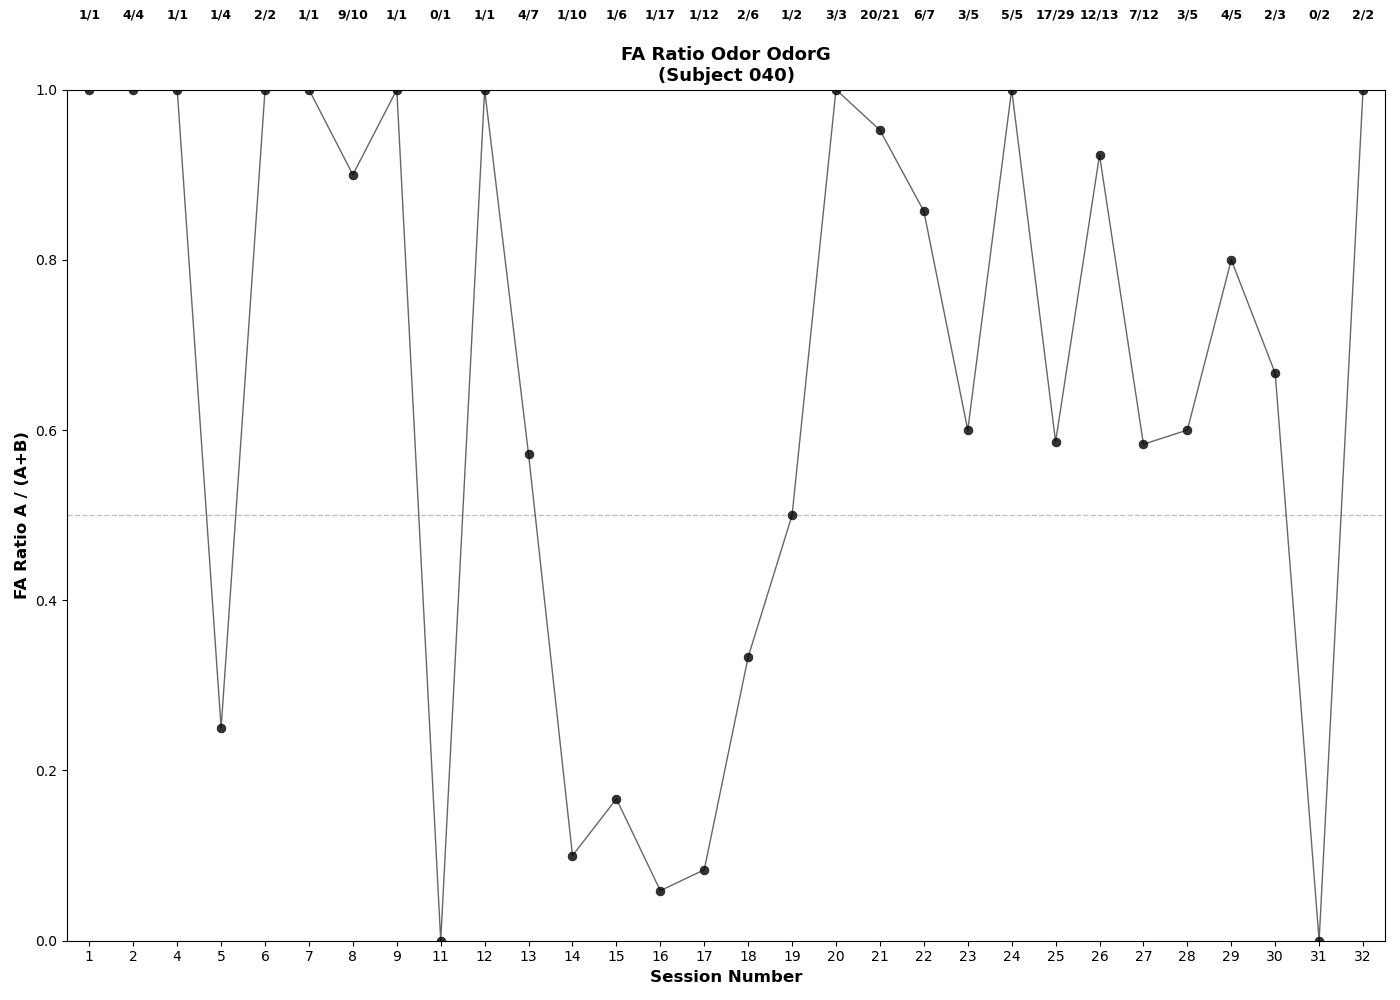

In [6]:
# Per odor plots bias if FA are for port A or B
figs = plot_fa_ratio_a_over_sessions(subjid, dates=dates)

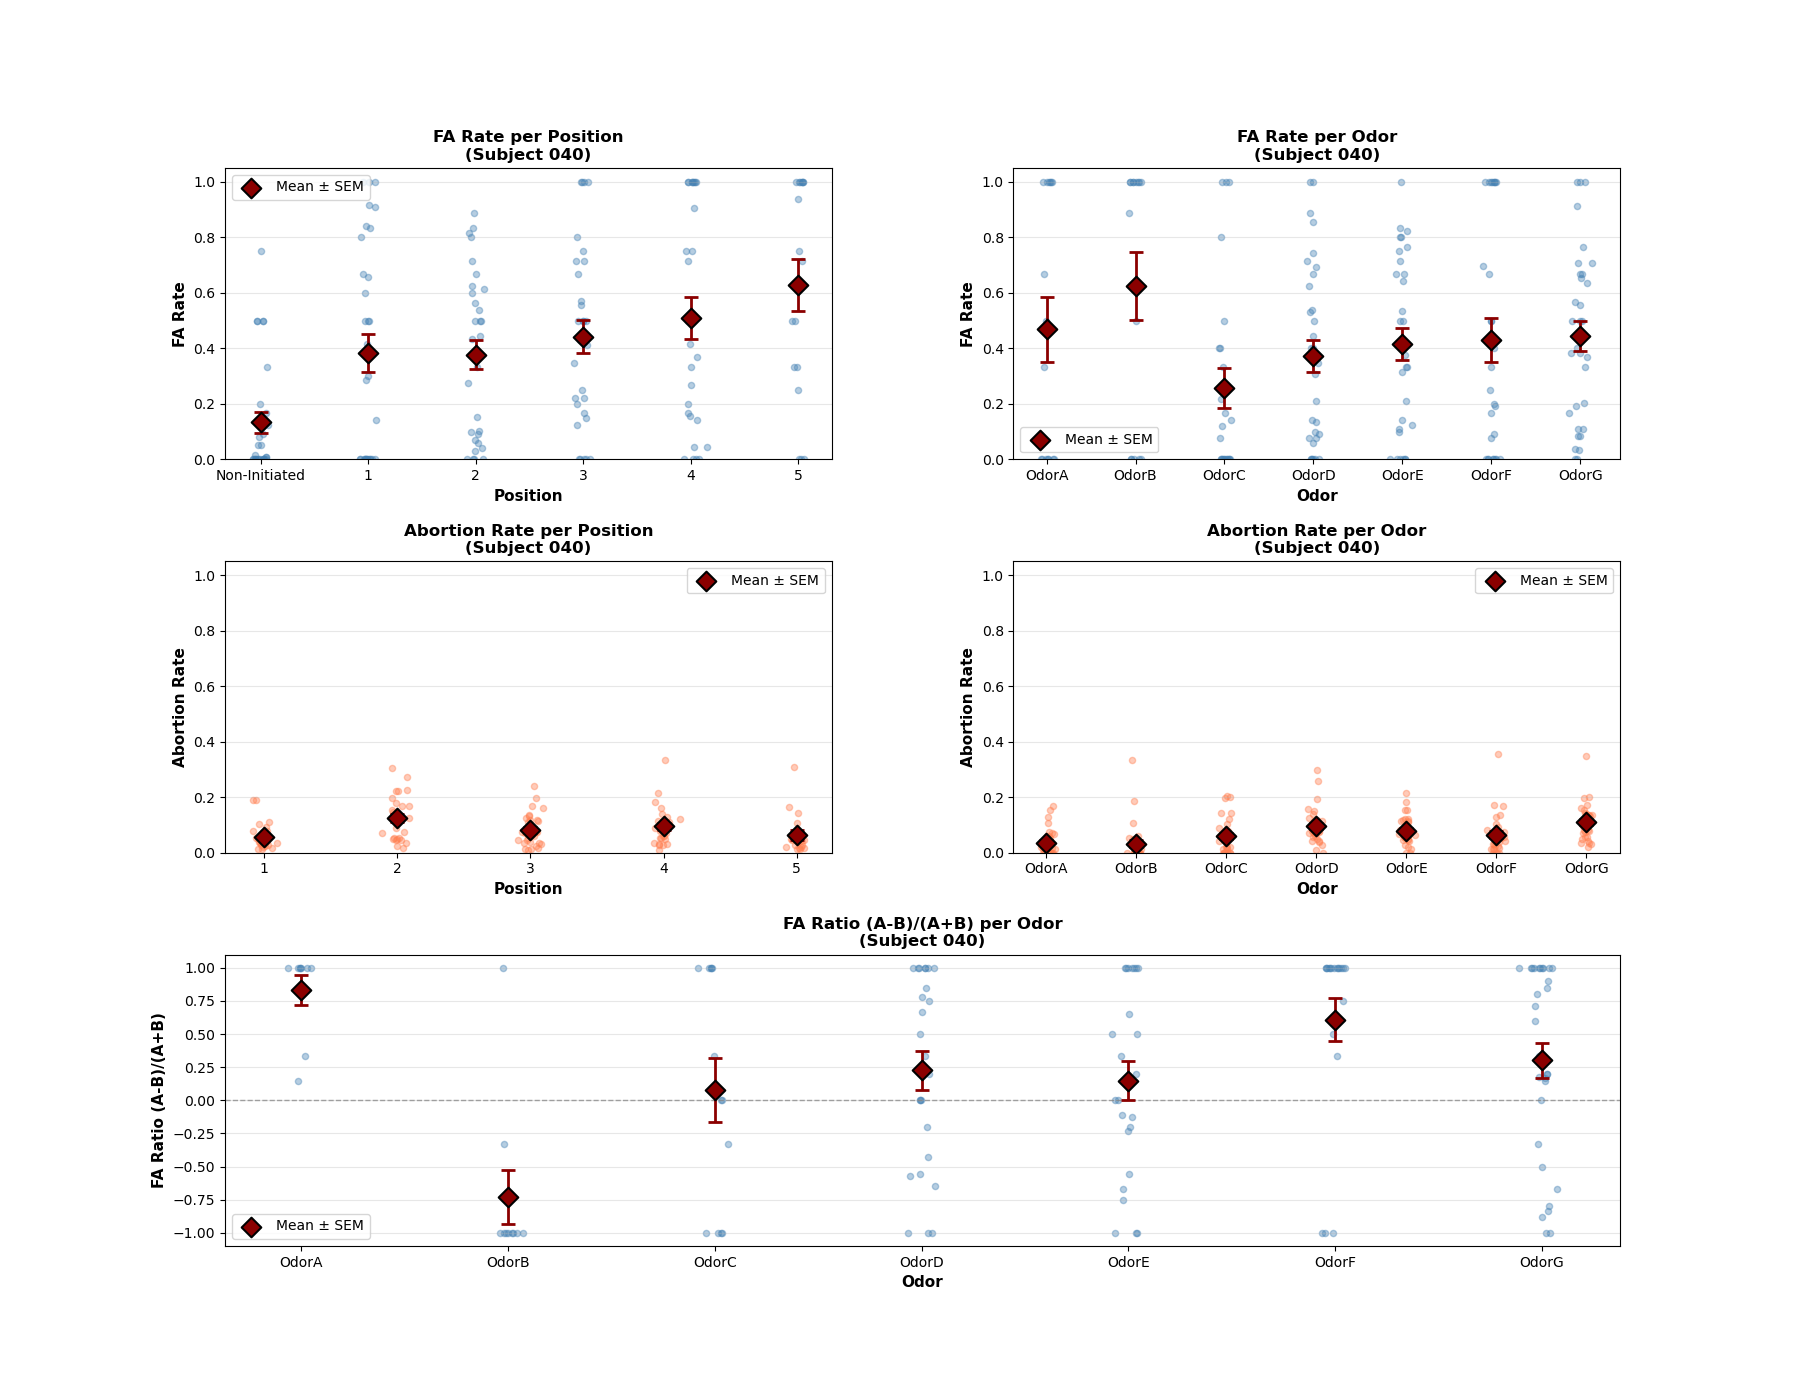

In [10]:
# Plots Early Choice and Abortion rates as boxplots across sessions for each position and odor. Can set what FA types to include and whether to include non-initiated trials in FA. 
fig, axes = plot_abortion_and_fa_rates(subjid, dates=dates, include_noninitiated_in_fa_odor=False, fa_types='FA_time_in') #can use one or more FA Type filter, or 'All'. E.g., use 'FA_time_in,FA_time_out'

[DEBUG 20251118] skipped: no hidden_rule_odors in summary params
[DEBUG 20251119] skipped: no hidden_rule_odors in summary params
[DEBUG 20251120] skipped: no hidden_rule_odors in summary params
[DEBUG 20251121] HR odor OdorB: no trials with odor in sequence
[DEBUG 20251124] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251124] skipped: all FAs at excluded position 5
[DEBUG 20251125] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251125] skipped: all FAs at excluded position 5
[DEBUG 20251126] HR odor OdorF: no trials with odor in sequence
[DEBUG 20251128] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251129] skipped: no FA rows after filtering (fa_types=FA_time_in)
[DEBUG 20251129] skipped: all FAs at excluded position 5
[DEBUG 20251201] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251210] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251211] HR odor OdorC: no trials with odor in sequence
[DEBUG 20251227] skipped:

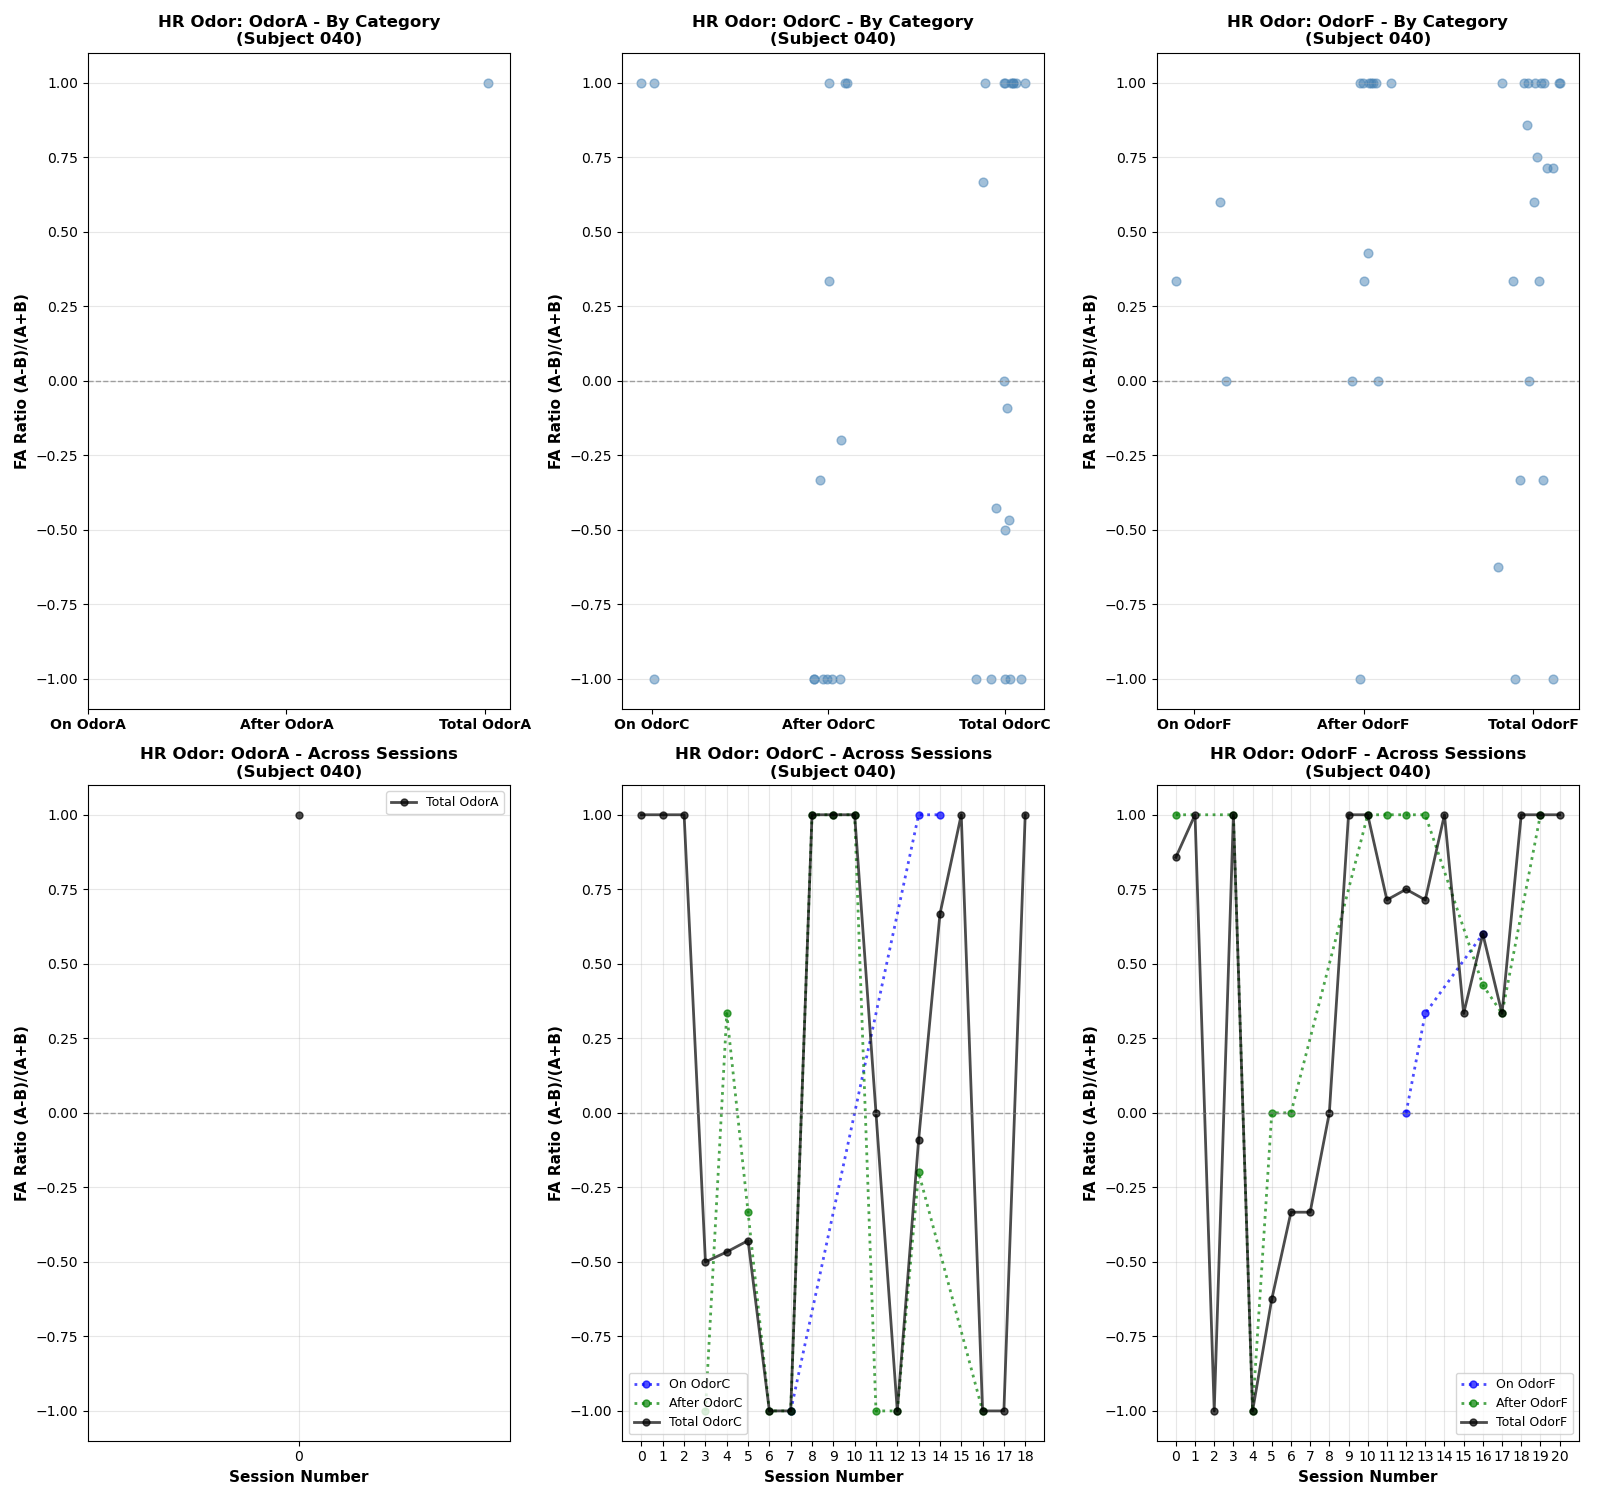

In [ ]:
# Plots if FAs are more often to reward port A or B for each odor, if FA is at that odor, one position after, or anywhere after. 
# Can filter by FA types: 'FA_time_in', 'FA_time_out', 'FA_late', or combinations like 'FA_time_in,FA_time_out'
# Can also exclude FAs at a specific position with exclude_last_pos=True (by default set to pos5, can be changed with last_odor_num=x)
fig, axes = plot_fa_ratio_by_hr_position(subjid, dates=dates, fa_types='FA_time_in', print_statistics=True, exclude_last_pos=True, debug=False)



DEBUG: Data aggregated from 26 sessions on dates: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.int64(20251219), np.int64(20251222), np.int64(20251223), np.int64(20251226), np.int64(20251229), np.int64(20251230)]
DEBUG: Color mapping: [np.int64(20251121), np.int64(20251124), np.int64(20251125), np.int64(20251126), np.int64(20251127), np.int64(20251128), np.int64(20251201), np.int64(20251203), np.int64(20251204), np.int64(20251205), np.int64(20251206), np.int64(20251208), np.int64(20251209), np.int64(20251210), np.int64(20251211), np.int64(20251212), np.int64(20251215), np.int64(20251216), np.int64(20251217), np.int64(20251218), np.in

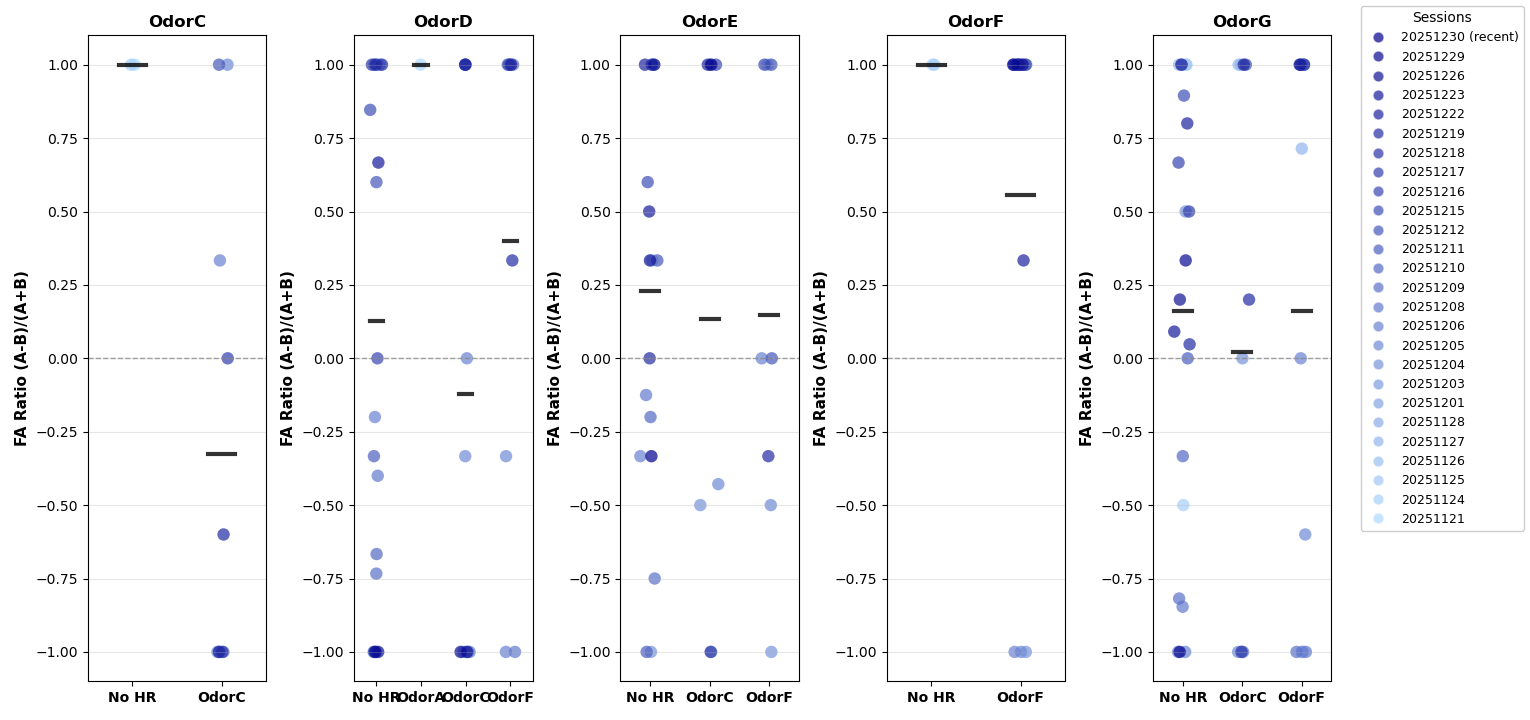

In [22]:
# Plot FA Ratio by Abortion Odor (comparing HR vs No HR trials)
# Shows FA distribution across aborted sequences grouped by the odor where abortion occurred
fig, axes = plot_fa_ratio_by_abort_odor(subjid, dates=dates, fa_types='FA_time_in')


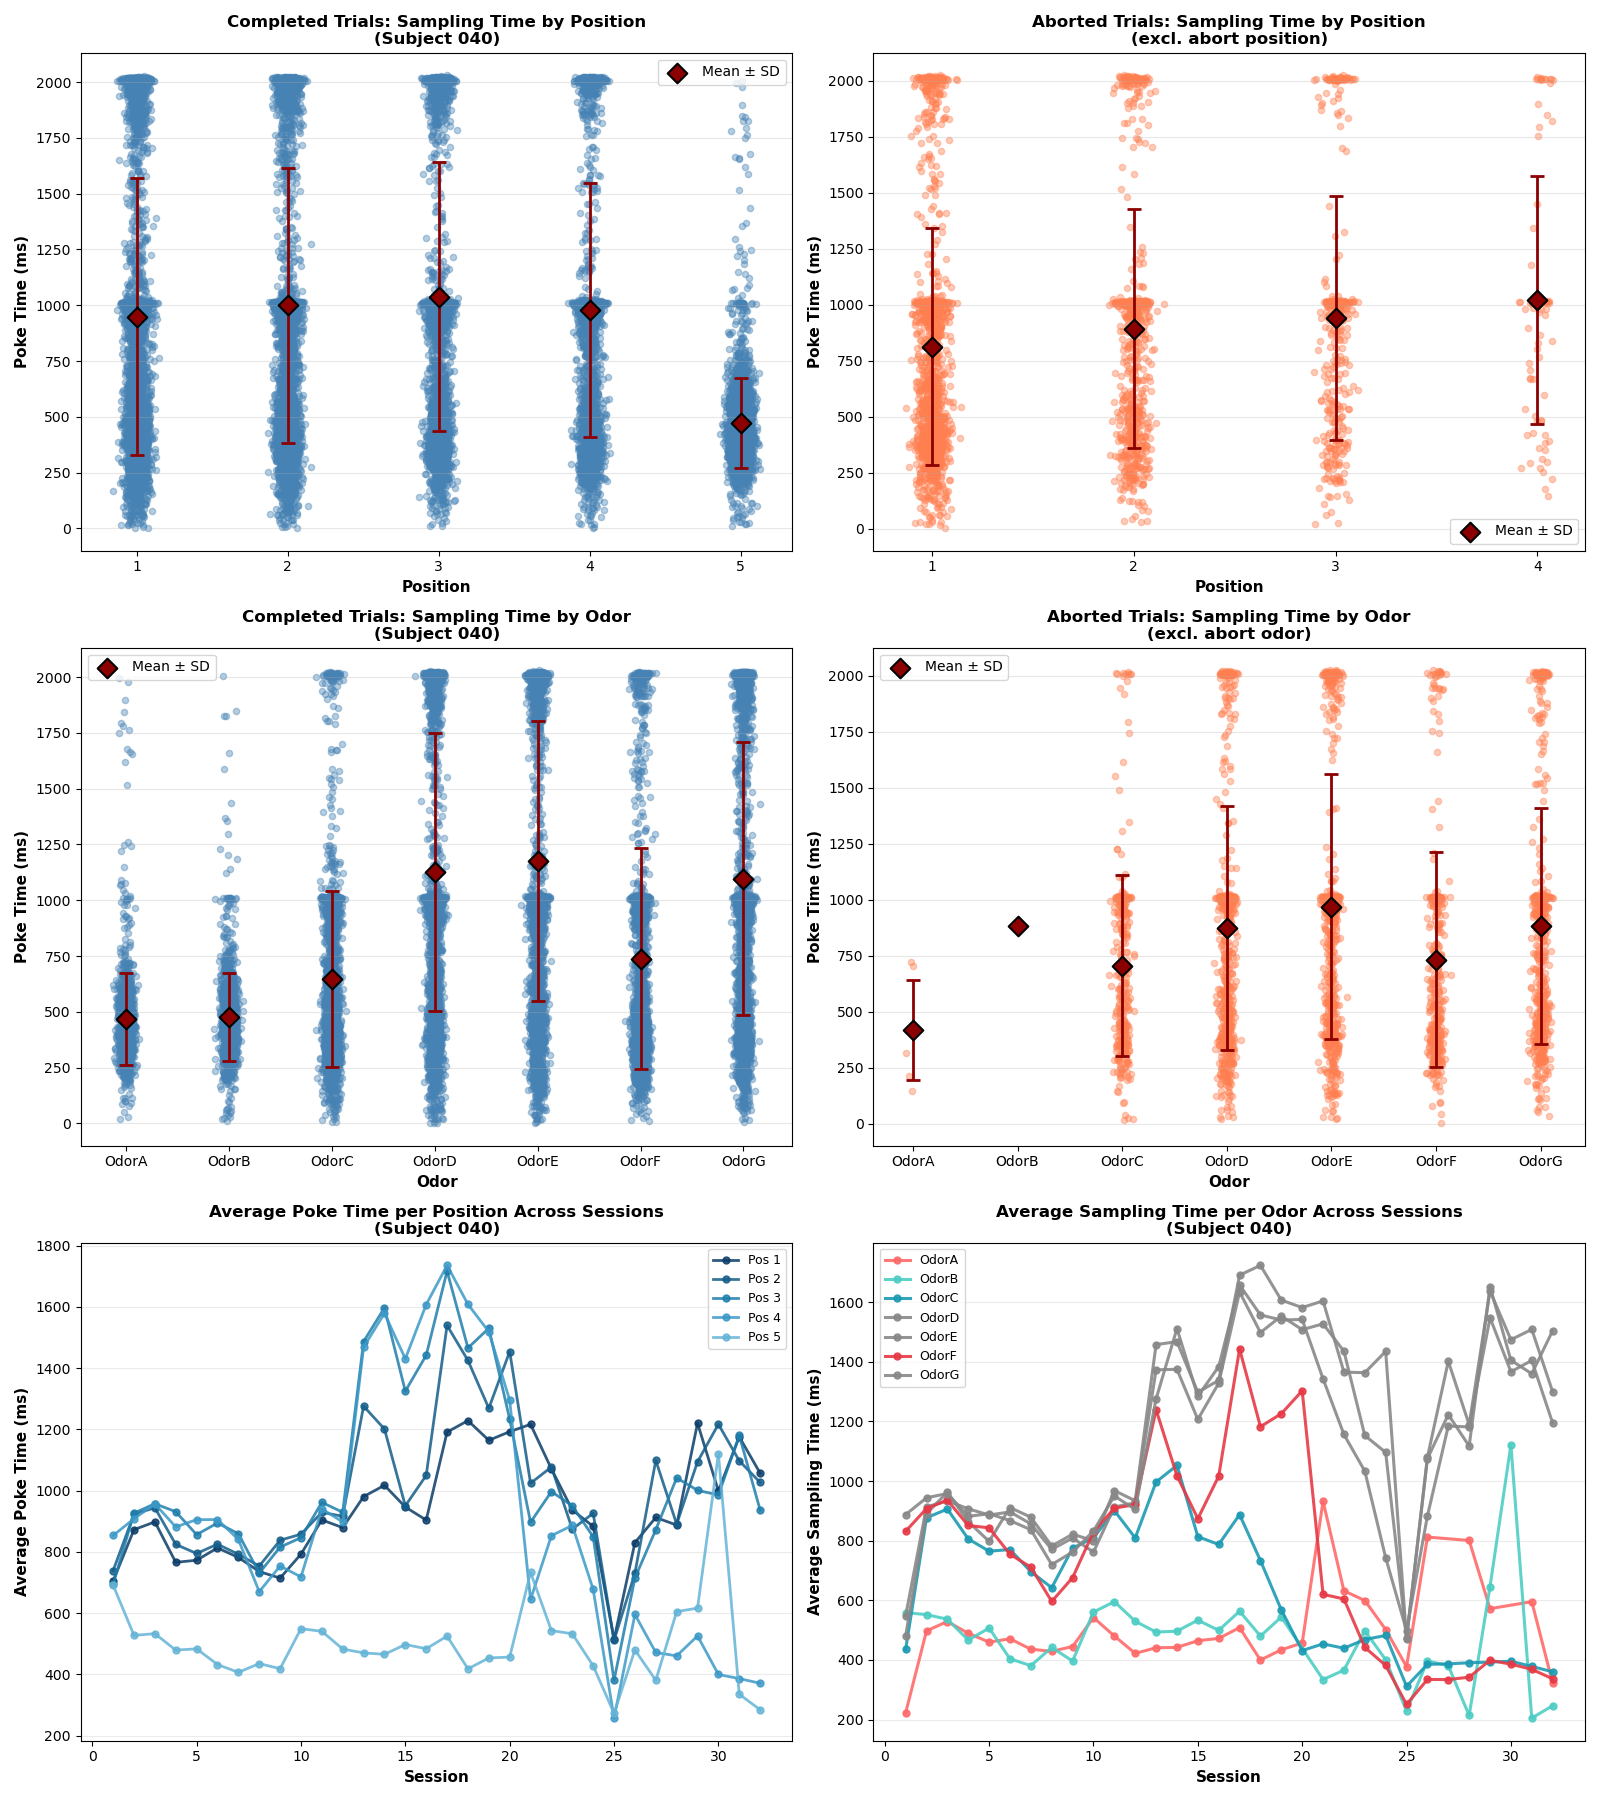

In [14]:
# Plots boxplots of every sampling time across all sessions, sepearated by position and odor. For completed trials and aborted trials. 
fig, axes = plot_sampling_times_analysis(subjid, dates=dates)

[_clean_graph] title: Subject 040 - Decision Accuracy by Odor
[_clean_graph] x label: Days
[_clean_graph] y label: Accuracy
[_clean_graph] x ticks: [-6.0, -1.0, 4.0, 9.0, 14.0, 19.0, 24.0, 29.0, 34.0]
[_clean_graph] y ticks: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]


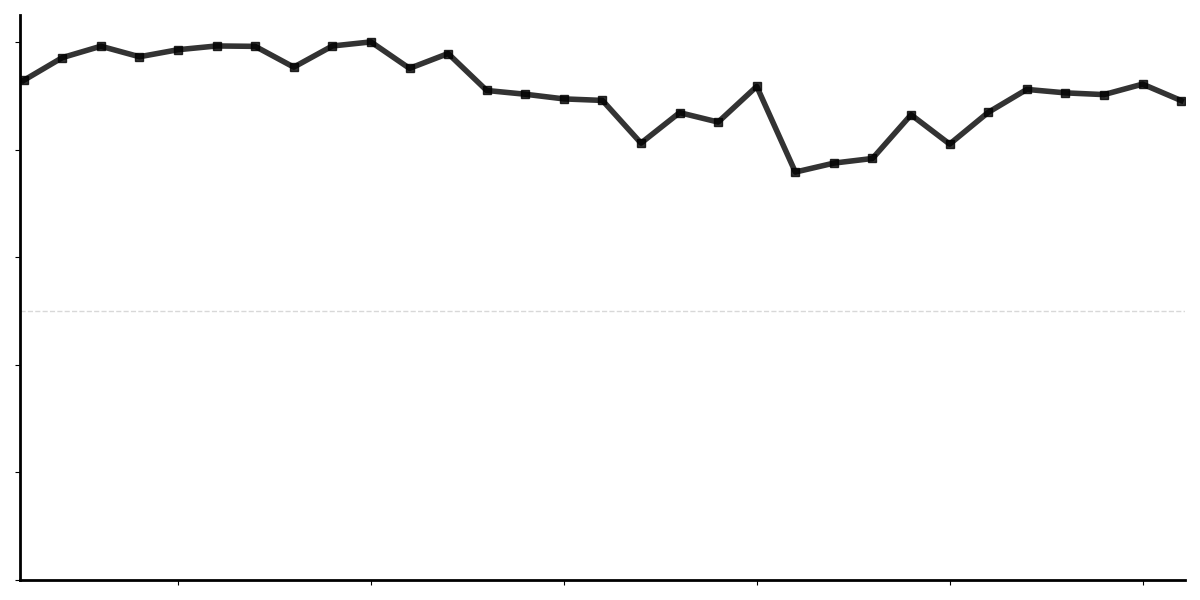

In [36]:
# Plot decision accuracy, with option to plot accuracy for A and B and global choice accuracy. 
fig, ax = plot_decision_accuracy_by_odor(40, dates=(20251118, 20251231), plot_choice_acc=False, plot_AB=False, clean_graph=True)

[_clean_graph] x label: Days
[_clean_graph] y label: Hidden Rule Detection Rate
[_clean_graph] x ticks: [5.0, 10.0, 15.0, 25.0]
[_clean_graph] y ticks: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]


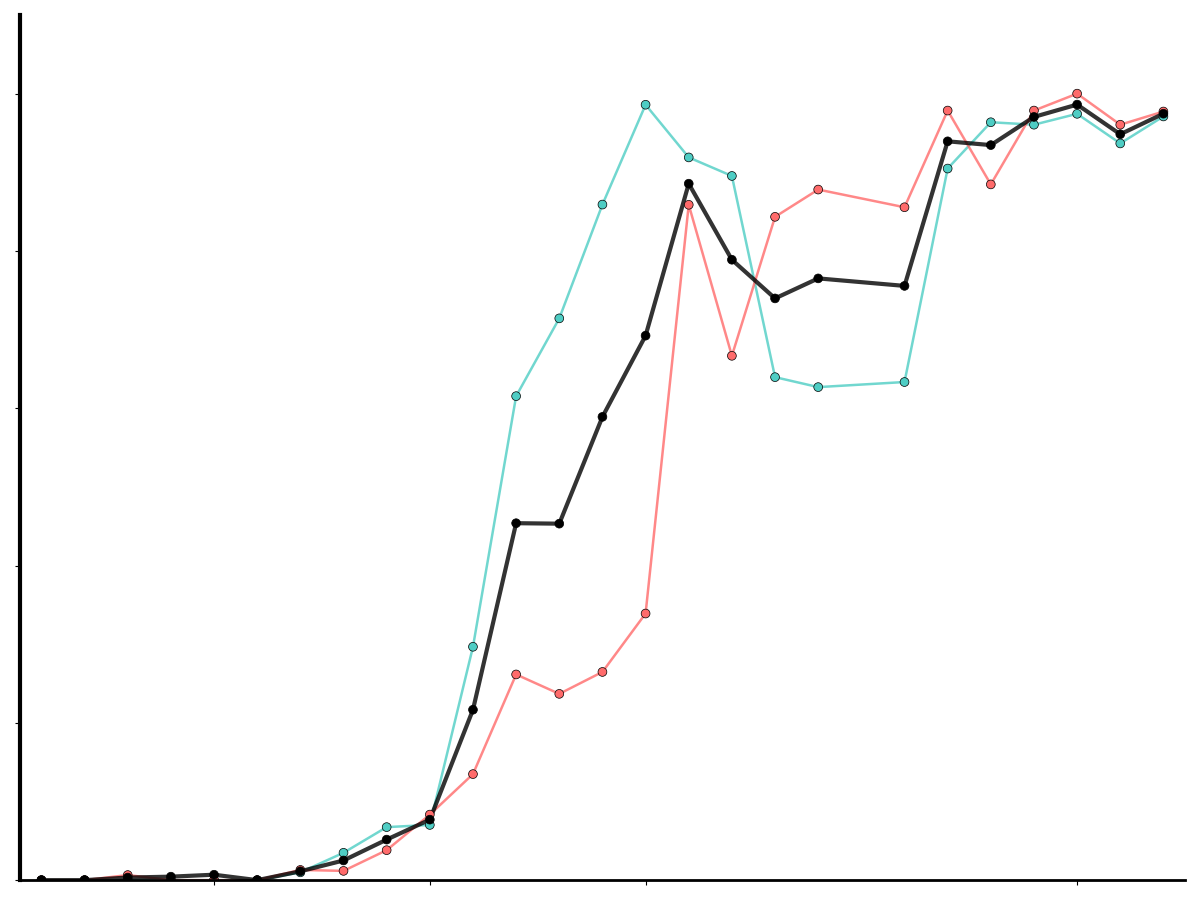

In [3]:
figs = plot_behavior_metrics(
    subjids=[40],
    dates=(20251125, 20251231),
    variables=[
        "hidden_rule_detection_rate",
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True, 
    black_white=True, 
    y_range=(0, 1.1), 
    plot_HR_separately=True, 
    clean_graph=True, 
)

# 2. Behavior / Movement analysis

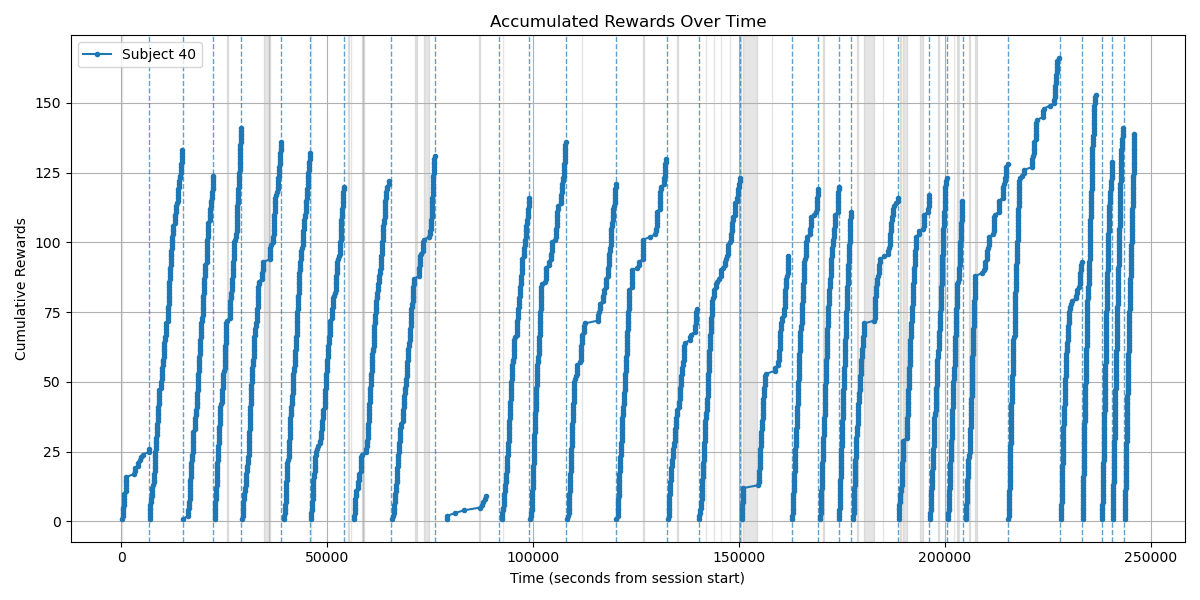

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Accumulated Rewards Over Time'}, xlabel='Time (seconds from session start)', ylabel='Cumulative Rewards'>)

In [16]:
# Plot cumulative rewards for multiple sessions and subjects. Can be split by days or consecutive. 
plot_cumulative_rewards(subjids=[subjid], dates=dates, split_days=True)

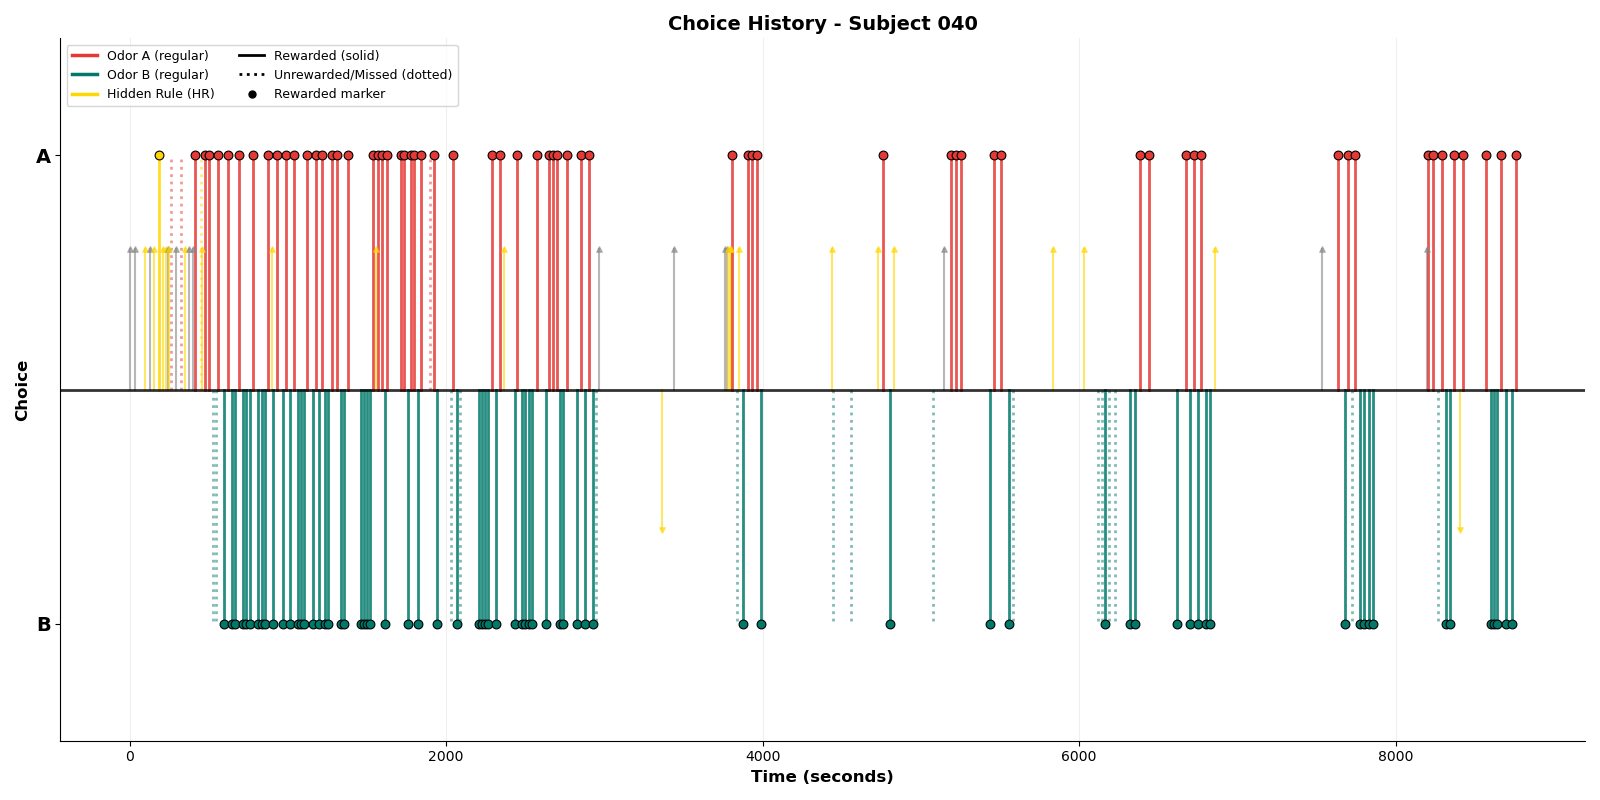

In [26]:
# Plots all choices for one or more sessions
choice_plots = plot_choice_history(subjid=40, dates=[20251203])

Loaded SLEAP tracking: 408887 frames from sub-040_ses-20251120_combined_sleap_tracking_timestamps.csv


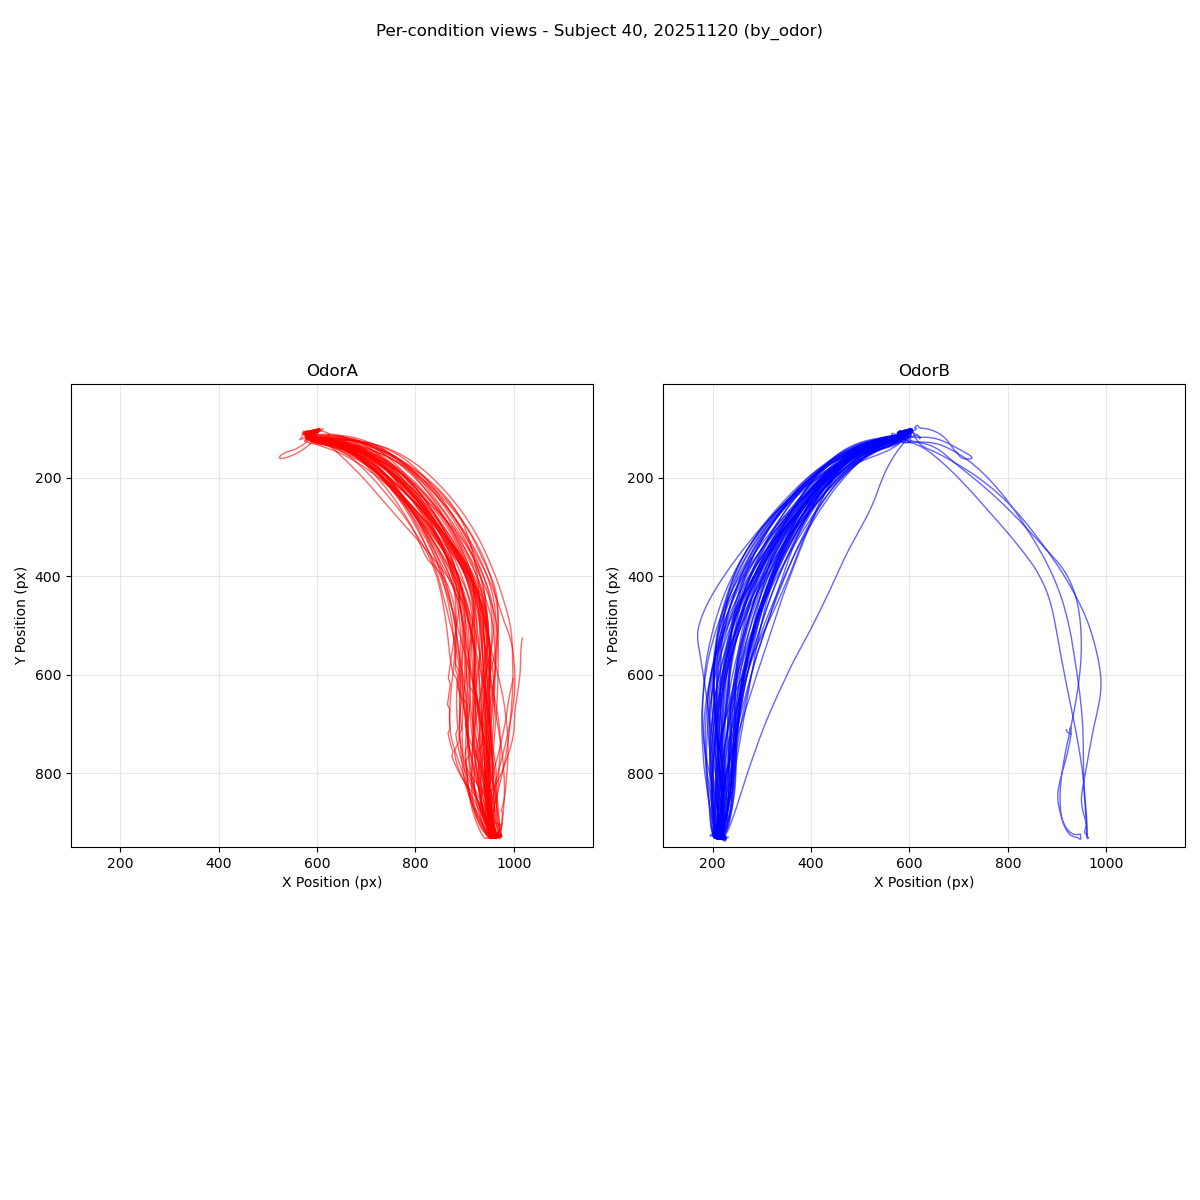

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Movement - Subject 40, 20251120 (by_odor)'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

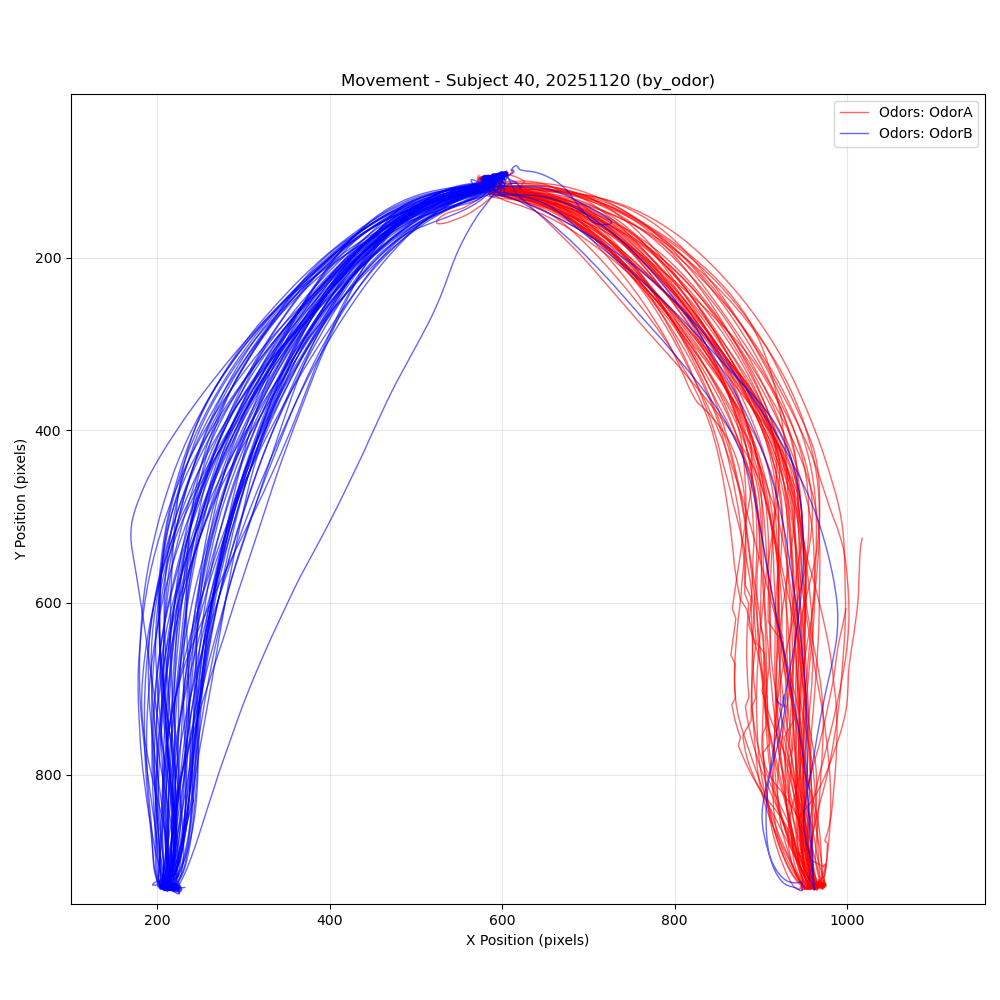

In [4]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows), or trial_windows_rew
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(40, 20251120, mode='by_odor', trial_windows=[(0, 10), (-10,None)], xlim=(100,1160), ylim=(10,950))


## Plot movement traces for different modes - plot_trial_trace_by_mode quick guide

- Common args: subjid, dates (list [] or range ()), xlim, ylim, smooth_window (frames), linewidth, alpha, invert_y
- Modes: 
    - rewarded: rewarded trials only
    - rewarded_hr: rewarded trials; HR trials colored with HR palette
    - completed: all completed trials (rewarded, unrewarded, timeout)
    - all_trials: completed and aborted trials
    - fa_by_response: FA trials (selected by fa_types filter), sorted by response port
    - fa_by_odor: FA trials, sorted by each aborted odor
    - hr_only: hidden-rule trials, colored by associated reward port, with rewarded and unrewarded trials
- Options: 
    - show_average: adds mean trace + SEM per category
    - highlight_hr: in rewarded/all_trials mode, recolor HR trials in different palette
    - color_by_index: ignore categories; color each trace by normalized sample index
    - fa_types: filter FA labels (select between "FA_time_in", "FA_time_out", or both)

Loaded SLEAP tracking: 240668 frames from sub-040_ses-20251121_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 454708 frames from sub-040_ses-20251124_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 388215 frames from sub-040_ses-20251125_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 452287 frames from sub-040_ses-20251126_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 449212 frames from sub-040_ses-20251127_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 480240 frames from sub-040_ses-20251128_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 604891 frames from sub-040_ses-20251129_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 389837 frames from sub-040_ses-20251201_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 493575 frames from sub-040_ses-20251203_combined_sleap_tracking_timestamps.csv
Loaded SLEAP tracking: 643632 frames from sub-040_ses-20251204_combined_sleap_trac

[<Figure size 1800x600 with 1 Axes>,
 <Figure size 1800x600 with 1 Axes>,
 <Figure size 1800x600 with 1 Axes>]

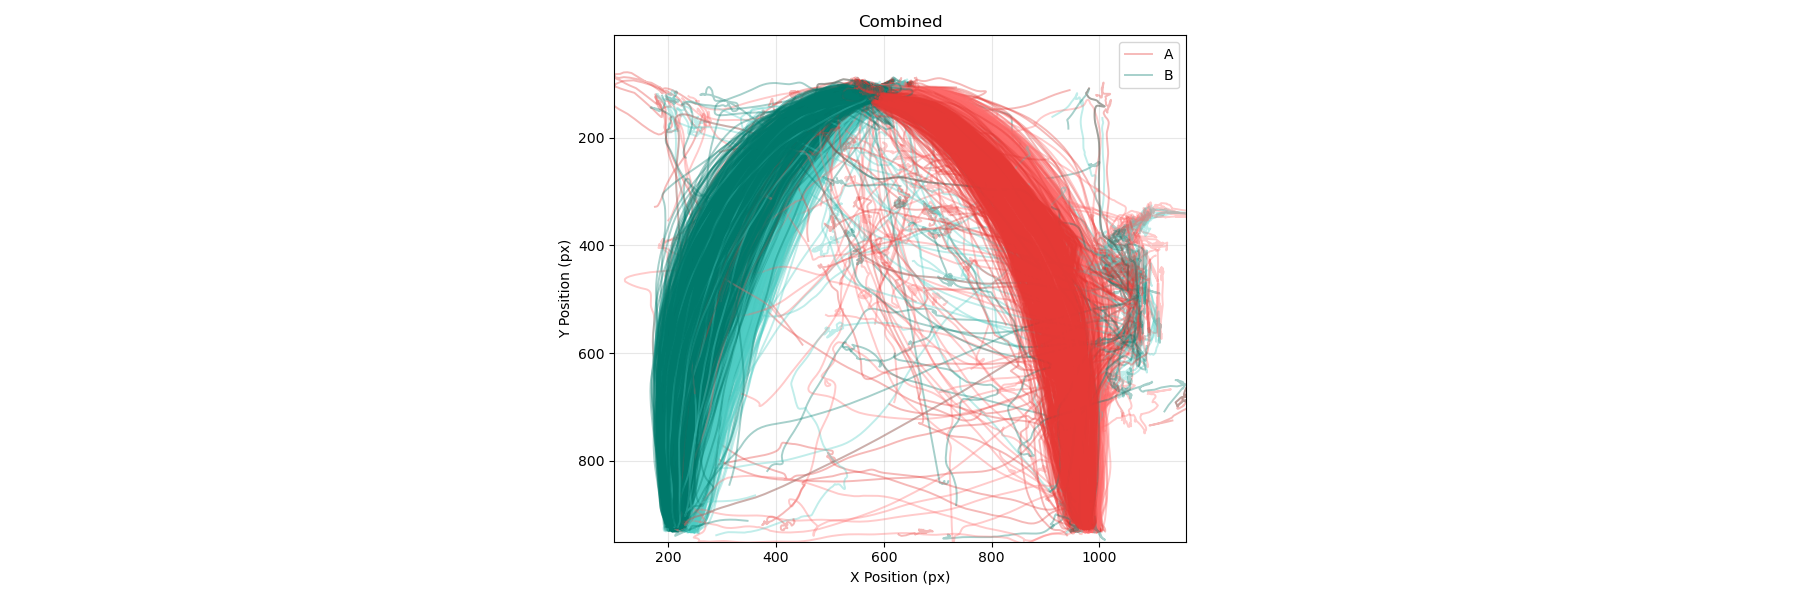

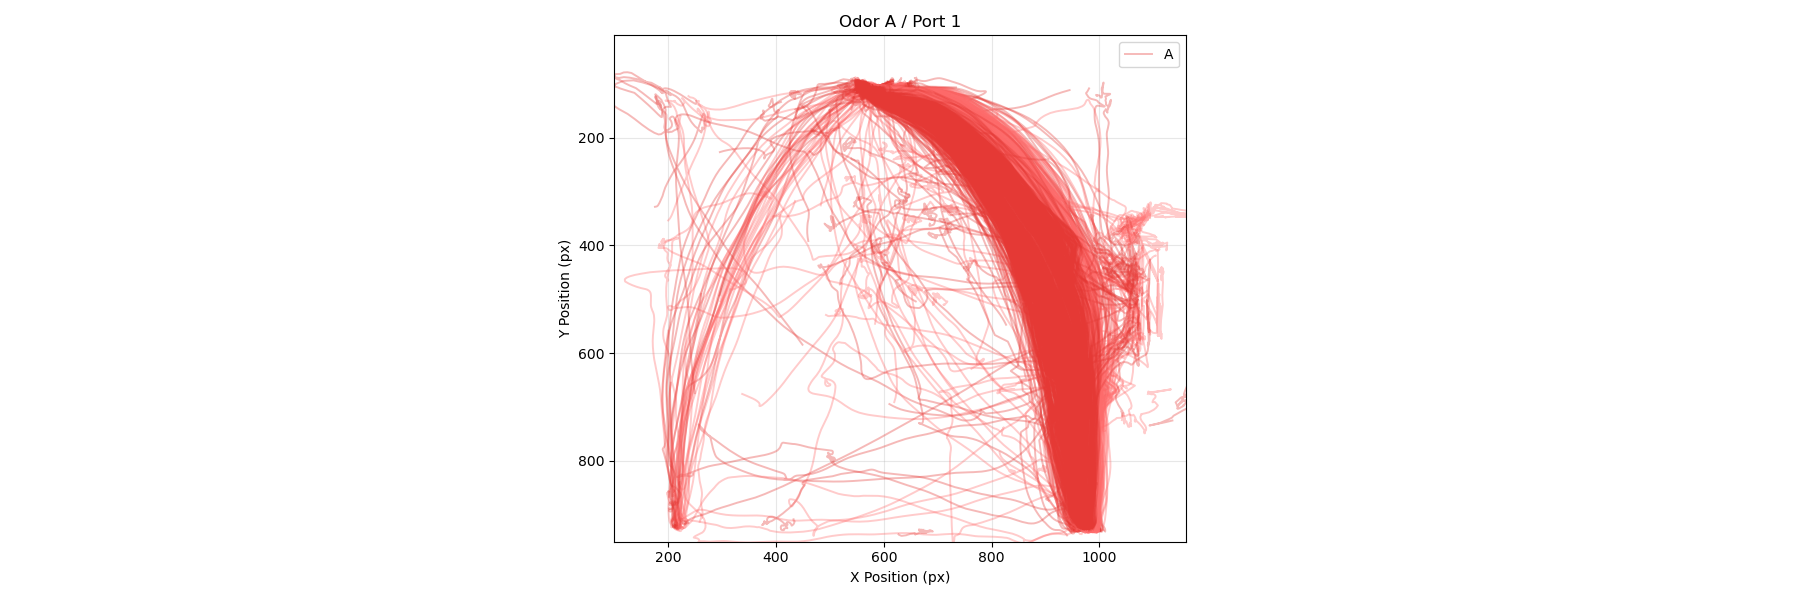

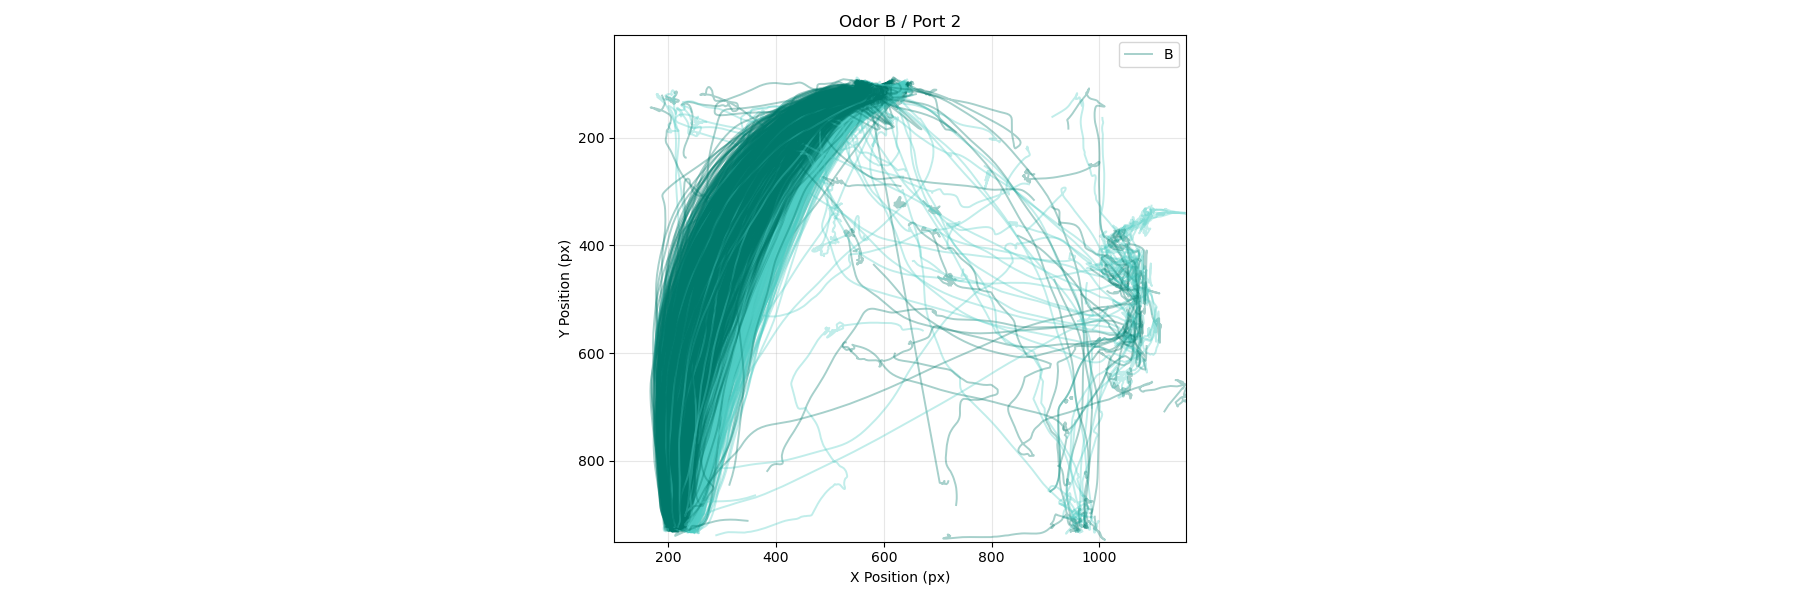

In [5]:
plot_trial_traces_by_mode(
    subjid=40,
    dates=(20251121, 20251231),
    mode='rewarded',
    xlim=(100,1160),
    ylim=(10,950),
    show_average=False, 
    highlight_hr=True, 
    color_by_index=False,
    fa_types=['FA_time_in']
)

# Modes: 
    # rewarded, rewarded_hr, completed, all_trials, fa_by_response, fa_by_odor, hr_only

In [18]:
plt.close('all')

In [10]:
print_cache_keys()

[CACHE CONTENTS] Current cache keys:
  (40, '20251121', 'sleap_session')
  (40, '20251124', 'sleap_session')
  (40, '20251125', 'sleap_session')
  (40, '20251126', 'sleap_session')
  (40, '20251127', 'sleap_session')
  (40, '20251128', 'sleap_session')
  (40, '20251129', 'sleap_session')
  (40, '20251201', 'sleap_session')
  (40, '20251203', 'sleap_session')
  (40, '20251204', 'sleap_session')
  (40, '20251205', 'sleap_session')
  (40, '20251206', 'sleap_session')
  (40, '20251208', 'sleap_session')
  (40, '20251209', 'sleap_session')
  (40, '20251210', 'sleap_session')
  (40, '20251211', 'sleap_session')
  (40, '20251212', 'sleap_session')
  (40, '20251215', 'sleap_session')
  (40, '20251216', 'sleap_session')
  (40, '20251217', 'sleap_session')
  (40, '20251218', 'sleap_session')
  (40, '20251222', 'sleap_session')
  (40, '20251223', 'sleap_session')
  (40, '20251226', 'sleap_session')
  (40, '20251227', 'sleap_session')
  (40, '20251229', 'sleap_session')
  (40, '20251230', 'sleap_s

# Debugging


[CACHE HIT] SLEAP session for subjid=40, date=20251120
Tracking loaded: 408887 frames. time range 2025-11-20 13:55:43.464544 → 2025-11-20 16:00:38.530976
Trial data loaded: 163 rows from \\ceph-gw02.hpc.swc.ucl.ac.uk\harris\hypnose\derivatives\sub-040_id-259\ses-019_date-20251120\saved_analysis_results


C:\Users\HarrisLab\AppData\Local\Temp\ipykernel_17712\90247624.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = seg.groupby("bin")["speed"].max()
C:\Users\HarrisLab\AppData\Local\Temp\ipykernel_17712\90247624.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = seg.groupby("bin")["speed"].max()
C:\Users\HarrisLab\AppData\Local\Temp\ipykernel_17712\90247624.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

Trials per condition (after filters): {'rewarded': 124, 'unrewarded': 1, 'fa': 30}


C:\Users\HarrisLab\AppData\Local\Temp\ipykernel_17712\90247624.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = seg.groupby("bin")["speed"].max()


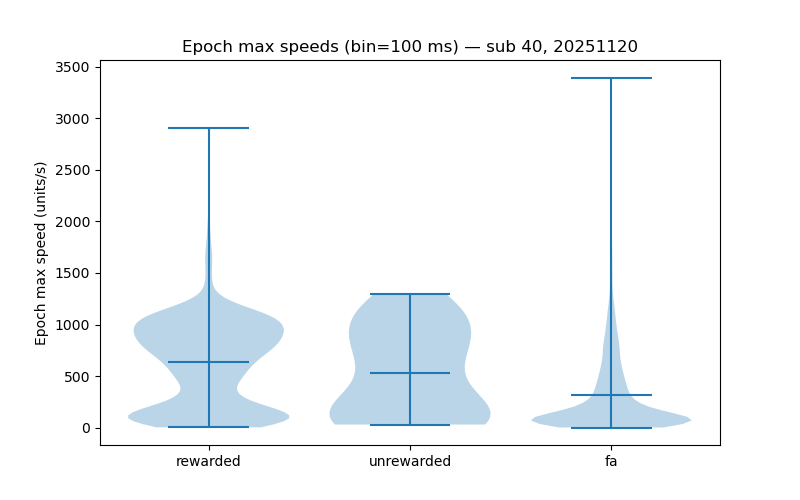

C:\Users\HarrisLab\AppData\Local\Temp\ipykernel_17712\90247624.py:207: RuntimeWarning: Mean of empty slice
  mean_speeds = np.nanmean(trial_stack, axis=0)


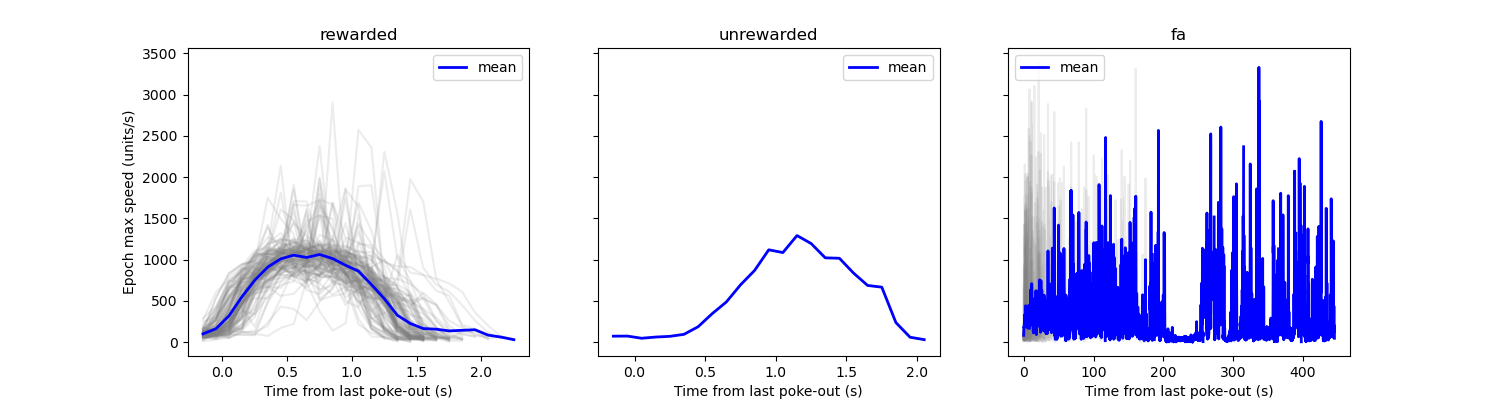

In [19]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hypnose_analysis.utils.visualization_utils import *

# Ensure we can import trial views helper
from hypnose_analysis.utils.visualization_utils import _load_trial_views, _load_tracking_and_behavior

# Parameters
subjid_example = 40
date_example = 20251120
bin_ms = 100
bin_s = bin_ms / 1000.0
pre_buffer_s = 0.2  # show 1s before last poke-out
# Accept multiple FA labels; default matches plot_trial_traces_by_mode behaviour
fa_label_filter = {"fa_time_in", "fa_time_out", "fa_late"}

# Helpers

def _safe_dt(val):
    try:
        return pd.to_datetime(val)
    except Exception:
        return pd.NaT

def _last_poke_out(row):
    pts = row.get("position_poke_times")
    if isinstance(pts, str):
        try:
            pts = json.loads(pts)
        except Exception:
            pts = None
    if isinstance(pts, dict) and pts:
        vals = list(pts.values())
        if all(isinstance(v, dict) and "position" in v for v in vals):
            vals = sorted(vals, key=lambda v: v.get("position", 0))
        last = vals[-1]
        return _safe_dt(last.get("poke_odor_end"))
    if isinstance(pts, list) and pts:
        last = pts[-1]
        if isinstance(last, dict):
            return _safe_dt(last.get("poke_odor_end"))
    for cand in ["poke_odor_end", "last_poke_out_time", "last_poke_time"]:
        if cand in row:
            return _safe_dt(row.get(cand))
    if "sequence_start" in row:
        return _safe_dt(row.get("sequence_start"))
    return pd.NaT


def _end_time(row, cond):
    if cond == "rewarded":
        return _safe_dt(row.get("first_supply_time")) or _safe_dt(row.get("sequence_end"))
    if cond == "unrewarded":
        return _safe_dt(row.get("first_reward_poke_time")) or _safe_dt(row.get("sequence_end"))
    if cond == "fa":
        return _safe_dt(row.get("fa_time")) or _safe_dt(row.get("sequence_end"))
    return _safe_dt(row.get("sequence_end"))


def _speed_by_bins(tracking_df, zero_dt, end_dt, edges, pre_buf_s):
    if pd.isna(zero_dt) or pd.isna(end_dt) or end_dt <= zero_dt:
        return None
    start_dt = zero_dt - pd.Timedelta(seconds=pre_buf_s)
    seg = tracking_df[(tracking_df["time"] >= start_dt) & (tracking_df["time"] <= end_dt)].copy()
    if seg.empty or {"X", "Y", "time"} - set(seg.columns):
        return None
    t_rel = (seg["time"] - zero_dt).dt.total_seconds().to_numpy()
    x = seg["X"].to_numpy()
    y = seg["Y"].to_numpy()
    vx = np.gradient(x, t_rel)
    vy = np.gradient(y, t_rel)
    speed = np.hypot(vx, vy)
    seg["speed"] = speed
    seg["t_rel"] = t_rel
    seg["bin"] = pd.cut(seg["t_rel"], bins=edges, right=False, include_lowest=True)
    out = seg.groupby("bin")["speed"].max()
    if out.empty:
        return None
    mids = edges[:-1] + (edges[1] - edges[0]) / 2
    arr = np.full_like(mids, np.nan, dtype=float)
    bin_to_idx = {b: i for i, b in enumerate(out.index.categories)}
    for b, v in out.items():
        idx = bin_to_idx.get(b)
        if idx is not None:
            arr[idx] = v
    return mids, arr


# Load data
results_dir = None
tracking = None
behavior = None
trial_data = None

try:
    tracking, behavior = _load_tracking_and_behavior(subjid_example, date_example)
    tracking = tracking.copy()
    tracking["time"] = pd.to_datetime(tracking["time"], errors="coerce")
    if "X" not in tracking.columns and "centroid_x" in tracking.columns:
        tracking["X"] = tracking["centroid_x"]
    if "Y" not in tracking.columns and "centroid_y" in tracking.columns:
        tracking["Y"] = tracking["centroid_y"]
    tracking = tracking.dropna(subset=["time", "X", "Y"]).reset_index(drop=True)
    print(f"Tracking loaded: {len(tracking)} frames. time range {tracking['time'].min()} → {tracking['time'].max()}")
except Exception as e:
    print("Data load error:", e)

try:
    derivatives_dir = get_derivatives_root()
    subj_str = f"sub-{str(subjid_example).zfill(3)}"
    subj_dir = list(derivatives_dir.glob(f"{subj_str}_id-*") )[0]
    ses_dir = list(subj_dir.glob(f"ses-*_date-{date_example}"))[0]
    results_dir = ses_dir / "saved_analysis_results"
    views = _load_trial_views(results_dir)
    trial_data = views.get("trial_data", pd.DataFrame()).copy()
    print(f"Trial data loaded: {len(trial_data)} rows from {results_dir}")
except Exception as e:
    print("Trial data load error:", e)

if trial_data is None or trial_data.empty or tracking is None or tracking.empty:
    print("No trial_data or tracking available; aborting preview.")
else:
    for c in ["sequence_start", "sequence_end", "first_supply_time", "first_reward_poke_time", "fa_time"]:
        if c in trial_data.columns:
            trial_data[c] = pd.to_datetime(trial_data[c], errors="coerce")

    def _condition_label(row):
        rtc = str(row.get("response_time_category", "")).lower()
        if rtc == "rewarded" and not row.get("is_aborted", False):
            return "rewarded"
        if rtc == "unrewarded" and not row.get("is_aborted", False):
            return "unrewarded"
        fa_label = str(row.get("fa_label", "")).lower()
        if fa_label.startswith("fa_") and (fa_label in fa_label_filter):
            return "fa"
        return None

    trials_info = []
    for _, row in trial_data.iterrows():
        cond = _condition_label(row)
        if cond is None:
            continue
        t_zero = _last_poke_out(row)
        t_end = _end_time(row, cond)
        if pd.isna(t_zero) or pd.isna(t_end) or t_end <= t_zero:
            continue
        dur_post = (t_end - t_zero).total_seconds()
        if dur_post <= 0:
            continue
        trials_info.append((cond, t_zero, t_end, dur_post))

    if not trials_info:
        print("No usable trials after filtering; aborting preview.")
    else:
        max_post = max(d for _, _, _, d in trials_info)
        edges = np.arange(-pre_buffer_s, max_post + bin_s, bin_s)
        mids = edges[:-1] + bin_s / 2

        speeds_by_cond = {"rewarded": [], "unrewarded": [], "fa": []}
        epoch_series = {"rewarded": [], "unrewarded": [], "fa": []}

        for cond, t_zero, t_end, _ in trials_info:
            res = _speed_by_bins(tracking, t_zero, t_end, edges, pre_buffer_s)
            if res is None:
                continue
            _, arr = res
            speeds_by_cond[cond].extend(arr[~np.isnan(arr)].tolist())
            epoch_series[cond].append(arr)

        print("Trials per condition (after filters):", {k: len(v) for k, v in epoch_series.items()})

        fig1, ax1 = plt.subplots(figsize=(8, 5))
        data = [speeds_by_cond[k] for k in ["rewarded", "unrewarded", "fa"] if speeds_by_cond[k]]
        labels = [k for k in ["rewarded", "unrewarded", "fa"] if speeds_by_cond[k]]
        if data:
            ax1.violinplot(data, showmeans=True, showextrema=True, widths=0.8)
            ax1.set_xticks(range(1, len(labels) + 1))
            ax1.set_xticklabels(labels)
            ax1.set_ylabel("Epoch max speed (units/s)")
            ax1.set_title(f"Epoch max speeds (bin={bin_ms} ms) — sub {subjid_example}, {date_example}")
            plt.show()
        else:
            ax1.text(0.5, 0.5, "No data", ha="center")
            ax1.set_title("No epochs found for filters")
            plt.show()
            print("No epochs found. Debug counts:")
            print("  response_time_category counts:", trial_data.get("response_time_category", pd.Series(dtype=str)).astype(str).str.lower().value_counts())
            if "fa_label" in trial_data.columns:
                print("  fa_label counts:", trial_data["fa_label"].astype(str).str.lower().value_counts())
            print("  trials kept per condition:", {k: len(v) for k, v in epoch_series.items()})
            labels = []

        if labels:
            fig2, axes2 = plt.subplots(1, len(labels), figsize=(5 * len(labels), 4), sharey=True)
            if len(labels) == 1:
                axes2 = [axes2]
            for ax, cond in zip(axes2, labels):
                trials = epoch_series[cond]
                if not trials:
                    ax.text(0.5, 0.5, "No trials", ha="center")
                    continue
                for arr in trials:
                    ax.plot(mids, arr, color="gray", alpha=0.15)
                trial_stack = np.vstack(trials)
                mean_speeds = np.nanmean(trial_stack, axis=0)
                ax.plot(mids, mean_speeds, color="blue", linewidth=2, label="mean")
                ax.set_title(cond)
                ax.set_xlabel("Time from last poke-out (s)")
                ax.legend()
            axes2[0].set_ylabel("Epoch max speed (units/s)")
            plt.show()


### Speed window sanity check (example: subjid 40, date 20251120)

We inspect one session and build per-trial speed windows for three conditions: Rewarded, Unrewarded, FA_time_in. Window = last poke-out (from `position_poke_times` → last `poke_odor_end`) to condition-specific end (`first_supply_time` for rewarded, `first_reward_poke_time` for unrewarded, `fa_time` for FA). We then bin speeds into 100 ms epochs, collect max speed per epoch per trial, and preview distributions and overlaid per-trial epoch traces to help choose thresholds.
